In [19]:
import pandas as pd

In [2]:
# Test models on new data
ictv_vmr40 = pd.read_excel('../data/VMR_MSL40.v1.20250307.xlsx',sheet_name=1)
caudo = ictv_vmr40[ictv_vmr40.Class=='Caudoviricetes']

C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [4]:
caudo[caudo.Order.notna()].shape

(1429, 28)

In [10]:
caudo[(caudo.Family.notna()) & (caudo.Family!='Unassigned')].shape

(3393, 28)

In [11]:
3393/5822

0.5827894194434902

In [5]:
# Test models on new data
ictv_vmr40 = pd.read_excel('../data/VMR_MSL40.v1.20250307.xlsx',sheet_name=1)
caudo = ictv_vmr40[ictv_vmr40.Class=='Caudoviricetes']

ictv_metadata = pd.read_csv('../data/4083_ICTV_metadata.csv')

test_phages = caudo[~caudo['Virus GENBANK accession'].isin(ictv_metadata['Virus GENBANK accession']) & 
                  ~caudo['Virus GENBANK accession'].isin(ictv_metadata['genome_accn'])]

C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [7]:
test_phages[test_phages.Order=='Crassvirales']

,Isolate ID,Species Sort,Isolate Sort,Realm,Subrealm,Kingdom,Subkingdom,Phylum,Subphylum,Class,...,ICTV_ID,Exemplar or additional isolate,Virus name(s),Virus name abbreviation(s),Virus isolate designation,Virus GENBANK accession,Genome coverage,Genome,Host source,Accessions Link
1157,VMR1024800,1158,1,Duplodnaviria,NaN,Heunggongvirae,NaN,Uroviricota,NaN,Caudoviricetes,...,ICTV202318301,E,Bacteroides cellulosilyticus phage 11,Bc11,NaN,OQ198719,Complete genome,dsDNA,bacteria,NCBI Nucleotide
1163,VMR1024987,1164,1,Duplodnaviria,NaN,Heunggongvirae,NaN,Uroviricota,NaN,Caudoviricetes,...,ICTV202318299,E,Bacteroides cellulosilyticus phage 1,Bc01,NaN,OQ198717,Complete genome,dsDNA,bacteria,NCBI Nucleotide
1165,VMR1025151,1166,1,Duplodnaviria,NaN,Heunggongvirae,NaN,Uroviricota,NaN,Caudoviricetes,...,ICTV202318300,E,Bacteroides cellulosilyticus phage 3,Bc03,NaN,OQ198718,Complete genome,dsDNA,bacteria,NCBI Nucleotide


In [ ]:
Bacteroides cellulosilyticus phage 3,OQ198718

In [18]:
test_phages.sample(n=5)[['Virus name(s)','Virus GENBANK accession']]

,Virus name(s),Virus GENBANK accession
1880,Microbacterium phage Barnstormer,OQ190478
5302,Streptococcus phage IPP45,KY065485
2496,Klebsiella phage vB_KpnS-VAC4,MZ428222
2120,Escherichia phage vB_EcoS-26175I,MK907267
3423,Gordonia phage Tardus,ON392159


In [47]:
test_phages[test_phages['Virus name(s)'].str.contains('175032')]

,Isolate ID,Species Sort,Isolate Sort,Realm,Subrealm,Kingdom,Subkingdom,Phylum,Subphylum,Class,...,ICTV_ID,Exemplar or additional isolate,Virus name(s),Virus name abbreviation(s),Virus isolate designation,Virus GENBANK accession,Genome coverage,Genome,Host source,Accessions Link
911,VMR1028523,912,1,Duplodnaviria,NaN,Heunggongvirae,NaN,Uroviricota,NaN,Caudoviricetes,...,ICTV202421322,E,Klebsiella phage 175032,NaN,NaN,PP357480,Complete genome,dsDNA,bacteria,NCBI Nucleotide


In [23]:
test_names = pd.read_table('C:/Users/crtuser/Downloads/test_pdbs_names.csv',header=None)

In [26]:
test_names[0] = test_names[0].str.replace('.pdb','')

In [28]:
test_names['phage'] = test_names[0].str.split('[').str[1]

In [30]:
test_names.phage.unique()

array(['uncultured phage_Deep-GF0-KM16-C193]',
       'Streptomyces phage Ignacio]', 'Streptomyces phage Cumberbatch]',
       'Arthrobacter phage Yavru]', 'Pseudomonas phage psageK4e]',
       'Salmonella phage vB_SenS_S528]', 'Gordonia phage Tardus]',
       'Acinetobacter phage APK127v]',
       'Microbacterium phage Barnstormer]', 'Yersinia phage vB_YpEc11]',
       'Klebsiella phage 175032]', nan], dtype=object)

In [50]:
test_names.loc[test_names.phage=='uncultured phage_Deep-GF0-KM16-C193]','genome'] = 'KT997876'
test_names.loc[test_names.phage=='Streptomyces phage Ignacio]','genome'] = 'MT451980'
test_names.loc[test_names.phage=='Streptomyces phage Cumberbatch]','genome'] = 'MT451982'
test_names.loc[test_names.phage=='Arthrobacter phage Yavru]','genome'] = 'MT889364'
test_names.loc[test_names.phage=='Pseudomonas phage psageK4e]','genome'] = 'MZ868713'
test_names.loc[test_names.phage=='Salmonella phage vB_SenS_S528]','genome'] = 'OK108608'
test_names.loc[test_names.phage=='Gordonia phage Tardus]','genome'] = 'ON392159'
test_names.loc[test_names.phage=='Acinetobacter phage APK127v]','genome'] = 'ON210142'
test_names.loc[test_names.phage=='Microbacterium phage Barnstormer]','genome'] = 'OQ190478'
test_names.loc[test_names.phage=='Yersinia phage vB_YpEc11]','genome'] = 'OQ828306'
test_names.loc[test_names.phage=='Klebsiella phage 175032]','genome'] = 'PP357480'
test_names.loc[test_names[0].str.contains('Z20_NODE_1015_length_44282_cov_10.715287'),'genome'] = 'Z20_NODE_1015_length_44282_cov_10.715287'

In [53]:
test_names

,0,phage,genome
0,ANS05735.1 hypothetical protein [uncultured ph...,uncultured phage_Deep-GF0-KM16-C193],KT997876
1,ANS05736.1 hypothetical protein [uncultured ph...,uncultured phage_Deep-GF0-KM16-C193],KT997876
2,ANS05738.1 tail tubular protein A [uncultured ...,uncultured phage_Deep-GF0-KM16-C193],KT997876
3,ANS05739.1 capsid protein [uncultured phage_De...,uncultured phage_Deep-GF0-KM16-C193],KT997876
4,ANS05740.1 hypothetical protein [uncultured ph...,uncultured phage_Deep-GF0-KM16-C193],KT997876
...,...,...,...
760,Z20_NODE_1015_length_44282_cov_10.715287_68,NaN,Z20_NODE_1015_length_44282_cov_10.715287
761,Z20_NODE_1015_length_44282_cov_10.715287_6,NaN,Z20_NODE_1015_length_44282_cov_10.715287
762,Z20_NODE_1015_length_44282_cov_10.715287_7,NaN,Z20_NODE_1015_length_44282_cov_10.715287
763,Z20_NODE_1015_length_44282_cov_10.715287_8,NaN,Z20_NODE_1015_length_44282_cov_10.715287


In [54]:
test_names['protein'] = test_names[0].str.split(' ').str[0]

In [56]:
test_names[['genome','protein']].to_csv('C:/Users/crtuser/Downloads/genome_protein_metadata.csv',index=False)

In [ ]:
# caudo.shape[0]

In [5]:
1429/5822

0.24544829955341807

In [4]:
test_phages.shape

(1764, 28)

C:\Users\crtuser\AppData\Local\Temp\ipykernel_512\279143641.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ictv_metadata_caudo['Order'] = ictv_metadata_caudo['Order'].fillna('Unclassified')


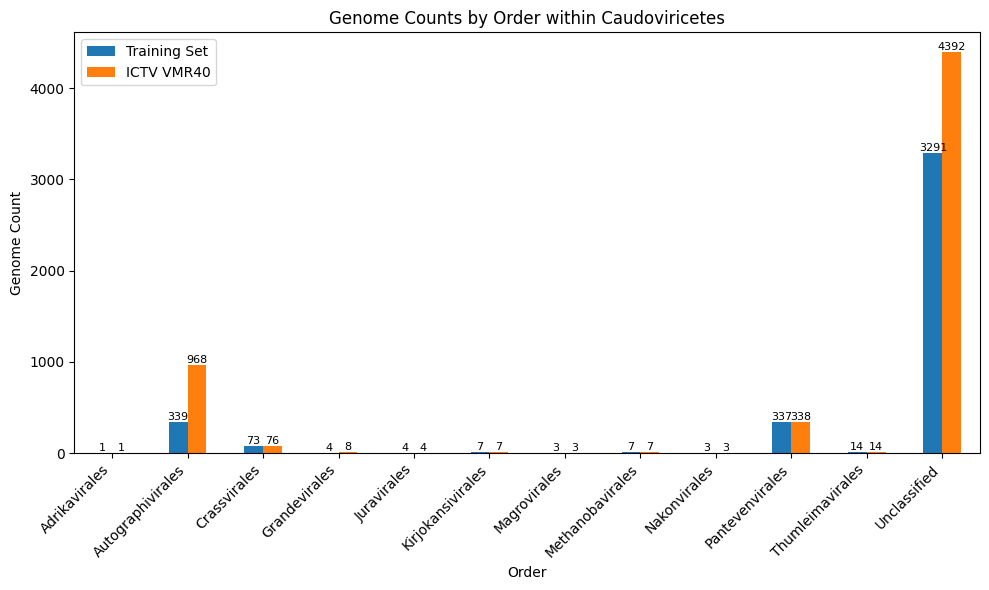

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

ictv_metadata_caudo['Order'] = ictv_metadata_caudo['Order'].fillna('Unclassified')
caudo['Order'] = caudo['Order'].fillna('Unclassified')

# Example input series (replace with your actual data)
train_counts = ictv_metadata_caudo.groupby(['Order'])['genome_accn'].count()
test_counts = caudo.groupby(['Order'])['Virus GENBANK accession'].count()

# Combine into a single DataFrame
df = pd.DataFrame({
    'Training Set': train_counts,
    'ICTV VMR40': test_counts
}).fillna(0).astype(int)

# Sort by index
df = df.sort_index()

# Plot
ax = df.plot(kind='bar', figsize=(10, 6))
ax.set_ylabel('Genome Count')
ax.set_title('Genome Counts by Order within Caudoviricetes')
ax.set_xticklabels(df.index, rotation=45, ha='right')
plt.tight_layout()
plt.legend()

# Add count labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                str(height),
                ha='center',
                va='bottom',
                fontsize=8
            )
            
plt.savefig('../plots/genome_counts_by_order.png', dpi=300, bbox_inches='tight')
plt.show()

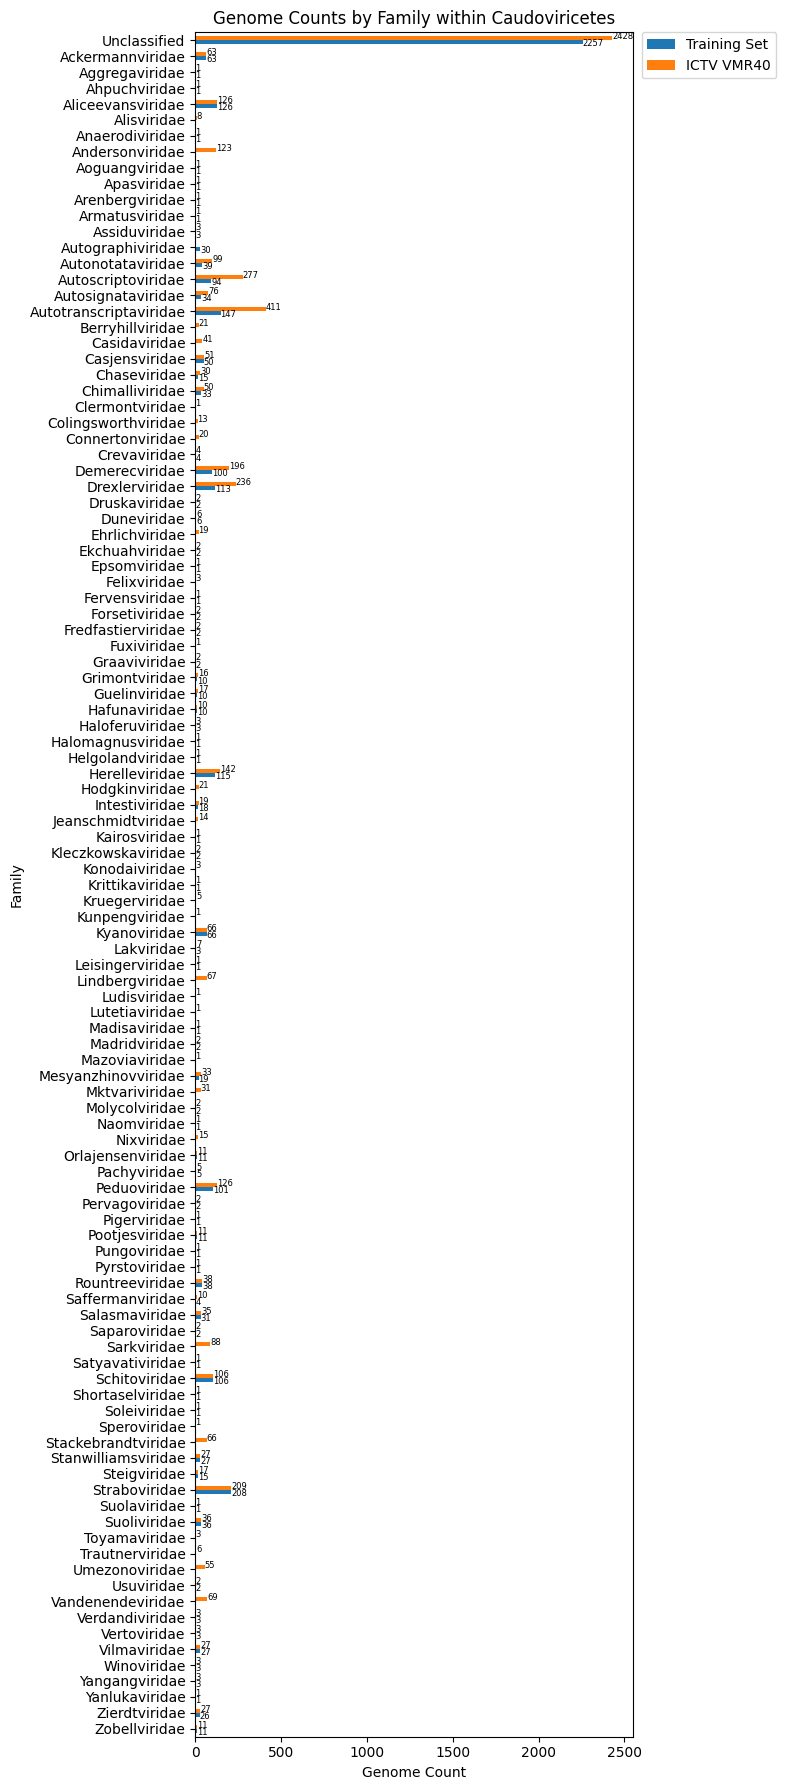

In [21]:
# Plot
ax = df.plot(kind='barh', figsize=(8, 18))
ax.set_xlabel('Genome Count')
ax.set_title('Genome Counts by Family within Caudoviricetes')

# Move legend outside top right of the plot
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

plt.tight_layout()

# Add count labels with vertical staggering between the two bars per family
offsets = [-0.1, 0.1]
for j, container in enumerate(ax.containers):
    for bar in container:
        width = bar.get_width()
        if width > 0:
            ax.text(
                width,
                bar.get_y() + bar.get_height() / 2 + offsets[j % 2],
                str(width),
                ha='left',
                va='center',
                fontsize=6
            )

plt.savefig('../plots/genome_counts_by_family_horizontal.png', dpi=300, bbox_inches='tight')
plt.show()

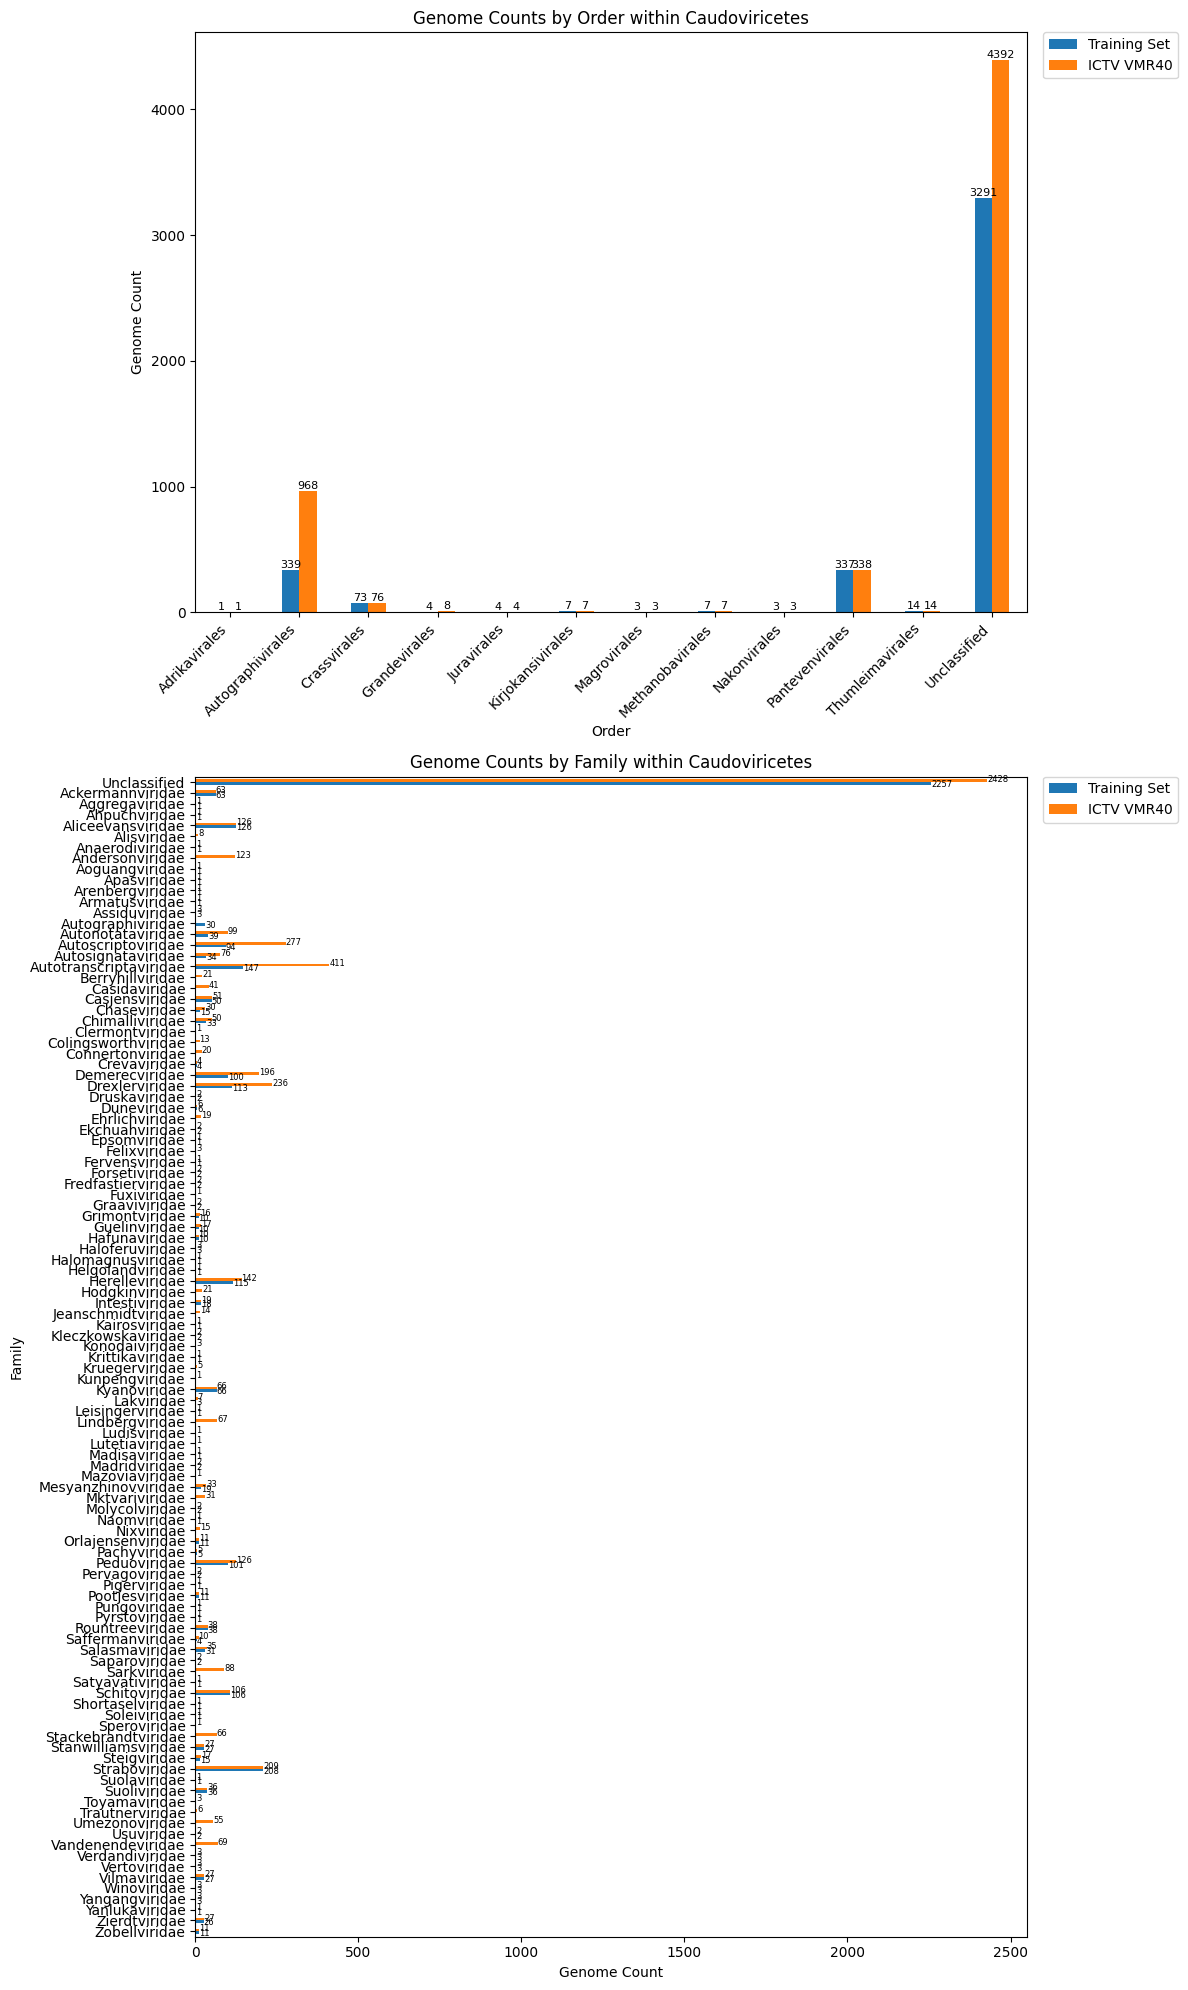

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Fill missing values
# Fix SettingWithCopyWarning
ictv_metadata_caudo.loc[:, 'Order'] = ictv_metadata_caudo['Order'].fillna('Unclassified')
ictv_metadata_caudo.loc[:, 'Family'] = ictv_metadata_caudo['Family'].replace('Unassigned', 'Unclassified').fillna('Unclassified')
caudo.loc[:, 'Order'] = caudo['Order'].fillna('Unclassified')
caudo.loc[:, 'Family'] = caudo['Family'].replace('Unassigned', 'Unclassified').fillna('Unclassified')


# --- ORDER plot data ---
train_counts_order = ictv_metadata_caudo.groupby(['Order'])['genome_accn'].count()
test_counts_order = caudo.groupby(['Order'])['Virus GENBANK accession'].count()

df_order = pd.DataFrame({
    'Training Set': train_counts_order,
    'ICTV VMR40': test_counts_order
}).fillna(0).astype(int).sort_index()

# --- FAMILY plot data ---
train_counts_family = ictv_metadata_caudo.groupby(['Family'])['genome_accn'].count()
test_counts_family = caudo.groupby(['Family'])['Virus GENBANK accession'].count()

df_family = pd.DataFrame({
    'Training Set': train_counts_family,
    'ICTV VMR40': test_counts_family
}).fillna(0).astype(int)

# Move 'Unclassified' to bottom and sort
if 'Unclassified' in df_family.index:
    unclassified = df_family.loc[['Unclassified']]
    df_family = df_family.drop(index='Unclassified')
else:
    unclassified = pd.DataFrame()
df_family = df_family.sort_index().iloc[::-1]
if not unclassified.empty:
    df_family = pd.concat([df_family, unclassified])

# --- Plot setup ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 20), gridspec_kw={'height_ratios': [1, 2]})

# --- Order plot ---
df_order.plot(kind='bar', ax=ax1)
ax1.set_ylabel('Genome Count')
ax1.set_title('Genome Counts by Order within Caudoviricetes')
ax1.set_xticklabels(df_order.index, rotation=45, ha='right')
ax1.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Count labels (Order)
for container in ax1.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:
            ax1.text(
                bar.get_x() + bar.get_width() / 2,
                height,
                str(height),
                ha='center',
                va='bottom',
                fontsize=8
            )

# --- Family plot ---
df_family.plot(kind='barh', ax=ax2)
ax2.set_xlabel('Genome Count')
ax2.set_title('Genome Counts by Family within Caudoviricetes')
ax2.legend(loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Count labels (Family)
offsets = [-0.1, 0.1]
for j, container in enumerate(ax2.containers):
    for bar in container:
        width = bar.get_width()
        if width > 0:
            ax2.text(
                width,
                bar.get_y() + bar.get_height() / 2 + offsets[j % 2],
                str(width),
                ha='left',
                va='center',
                fontsize=6
            )

plt.tight_layout()
plt.savefig('../plots/genome_counts_by_order_and_family.png', dpi=300, bbox_inches='tight')
plt.show()


# 11 orders in total - Final Caudoviricetes Training Set

In [8]:
len(caudo.Order.unique())

12

In [11]:
ictv_metadata_excluded = ictv_metadata[
    ~ictv_metadata['Order'].isin(caudo['Order'].unique()) & 
    (ictv_metadata['Order'] != 'Herpesvirales')
]['Order'].unique()

In [12]:
ictv_metadata_caudo = ictv_metadata[
    ictv_metadata['Order'].isin(caudo['Order'].unique())]

In [18]:
4147 - 63

4084

In [ ]:
pro

In [21]:
ictv_metadata[
    ~ictv_metadata['Order'].isin(caudo['Order'].unique()) & 
    (ictv_metadata['Order'] != 'Herpesvirales')
]['genome_accn'].to_frame().to_csv('../data/orders_phages_to_exclude_26_05_25.csv', index=False)

In [100]:
ictv_metadata = pd.read_csv('../data/4147_ICTV_metadata.csv')

In [5]:
print(ictv_metadata['Order'].apply(type).value_counts())

NameError: name 'ictv_metadata' is not defined

In [102]:
# Create mapping from Family to Order using the caudo table
family_to_order = caudo.groupby(['Order', 'Family']).size().reset_index(name='count')
family_to_order_mapping = dict(zip(family_to_order['Family'], family_to_order['Order']))

ictv_metadata['Order'] = ictv_metadata.apply(
    lambda row: family_to_order_mapping.get(row['Family'], row['Order']),
    axis=1
)

In [103]:
ictv_metadata.Order.unique()

array([nan, 'Pantevenvirales', 'Crassvirales', 'Kirjokansivirales',
       'Methanobavirales', 'Thumleimavirales', 'Herpesvirales',
       'Nakonvirales', 'Maximonvirales', 'Coyopavirales',
       'Atroposvirales', 'Juravirales', 'Magrovirales', 'Ligamenvirales',
       'Primavirales', 'Haloruvirales', 'Halopanivirales',
       'Belfryvirales', 'Adrikavirales', 'Grandevirales'], dtype=object)

# Build master taxonomy table from ICTV VMR40

In [14]:
import os
import pandas as pd
from tqdm import tqdm

# === CONFIG ===
# this folder contains all unzipped caudoviricetes proposals
download_dir = 'proposals_all/'
all_frames = []

# === TAXONOMY COLUMN FILTER ===
base_tax_cols = [
    "Realm", "Subrealm", "Kingdom", "Subkingdom", "Phylum", "Subphylum",
    "Class", "Subclass", "Order", "Suborder", "Family", "Subfamily",
    "Genus", "Subgenus", "Species", "Exemplar GenBank Accession Number", "Exemplar GenBank"
]

allowed_columns = (
    base_tax_cols +
    [f"{col}.1" for col in base_tax_cols] + [
        "Exemplar GenBank", "Exemplar GenBank Accession Number", "Exemplar virus name", "Virus name abbreviation",
        "Exemplar isolate designation", "Genome coverage", "Genome composition",
        "Host/Source", "Change", "Proposed Rank", "source_file"
    ]
)

# === LIST EXCEL FILES ===
file_list = [
    fname for fname in os.listdir(download_dir)
    if fname.endswith(".xlsx") and not fname.startswith("~$")
]

# === COLLECT WEIRD FILE FORMATS ===
odd = []


# === PROCESS FILES ===
for fname in tqdm(file_list, desc="Processing Excel files"):
    fpath = os.path.join(download_dir, fname)

    try:
        try:
            xl = pd.read_excel(fpath, header=2, sheet_name=0)
        except ValueError as e:
            if any(err_str in str(e).lower() for err_str in ["only 2 lines", "passed header"]):
                tqdm.write(f"↪️ Trying sheet 1 instead for {fname}...")
                xl = pd.read_excel(fpath, header=3, sheet_name=1)
            else:
                raise

        # Clean and normalize column names
        xl.columns = (
            xl.columns.map(str)
            .str.replace(r"[\r\n]+", " ", regex=True)   # Replace line breaks
            .str.replace(r"\s+", " ", regex=True)       # Normalize whitespace
            .str.strip()
        )

        print(xl.columns)

        # Rename GenBank-related column if needed
        genbank_like_cols = [col for col in xl.columns if 'GenBank' in col]
        if genbank_like_cols:
            best_genbank_col = genbank_like_cols[0]
            if best_genbank_col != "Exemplar GenBank Accession Number":
                tqdm.write(f"🛠️ Renaming '{best_genbank_col}' → 'Exemplar GenBank Accession Number'")
                xl = xl.rename(columns={best_genbank_col: "Exemplar GenBank Accession Number"})

        # Drop columns with numeric names (if still any)
        xl = xl.loc[:, [col for col in xl.columns if not col.isnumeric()]]

        # Optional: drop rows missing Class.1 (if present)
        if 'Class.1' in xl.columns:
            xl = xl[xl['Class.1'].notna()]

        # Check if GenBank column was successfully found
        if "Exemplar GenBank Accession Number" in xl.columns:
            print(f'✅🧬 GenBank Accession found in {fname}, shape: {xl.shape}')
        else:
            print(f'❌ GenBank Accession not found in {fname}')
            odd.append(fname)
            print("🔍 Columns containing 'GenBank':", genbank_like_cols)
            print('\n')

        # Track source file
        xl['source_file'] = fname

        # Subset to allowed columns
        xl = xl[[col for col in xl.columns if col in allowed_columns]]

        all_frames.append(xl)

    except Exception as e:
        tqdm.write(f"❌ Could not open {fname}: {e}")
        continue

# === CONCATENATE ALL FRAMES ===
if all_frames:
    combined_df = pd.concat(all_frames, ignore_index=True)
    print(f"\n✅ Final combined DataFrame shape: {combined_df.shape}")
else:
    print("⚠️ No valid files loaded.")

Processing Excel files:   0%|▏                                                         | 1/260 [00:00<02:07,  2.04it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.002B.R.Andrewesvirinae.xlsx, shape: (7, 49)


Processing Excel files:   1%|▍                                                         | 2/260 [00:00<02:05,  2.05it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.003B.R.Anthonyvirus.xlsx, shape: (2, 49)


Processing Excel files:   1%|▋                                                         | 3/260 [00:01<02:07,  2.02it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.004B.R.Archimedesvirus.xlsx, shape: (2, 49)


Processing Excel files:   2%|▉                                                         | 4/260 [00:02<02:28,  1.72it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.005B.R.Arquatrovirinae.xlsx, shape: (37, 49)


Processing Excel files:   2%|█                                                         | 5/260 [00:02<02:18,  1.84it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.006B.R.Backyardiganvirus.xlsx, shape: (17, 49)


Processing Excel files:   2%|█▎                                                        | 6/260 [00:03<02:15,  1.87it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.007B.R.Bclasvirinae.xlsx, shape: (21, 49)


Processing Excel files:   3%|█▌                                                        | 7/260 [00:03<02:00,  2.10it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.008B.R.Benedictvirus.xlsx, shape: (15, 49)


Processing Excel files:   3%|█▊                                                        | 8/260 [00:05<03:20,  1.26it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.010B.R.Binomial_names.xlsx, shape: (2527, 49)


Processing Excel files:   3%|██                                                        | 9/260 [00:06<04:42,  1.13s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.011B.R.Bippervirus.xlsx, shape: (2, 49)


Processing Excel files:   4%|██▏                                                      | 10/260 [00:08<05:25,  1.30s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.013B.R.Brujitavirus_new_species.xlsx, shape: (2, 49)


Processing Excel files:   4%|██▍                                                      | 11/260 [00:08<04:12,  1.01s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.014B.R.Bundooravirus.xlsx, shape: (1, 49)


Processing Excel files:   5%|██▋                                                      | 12/260 [00:09<03:31,  1.17it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.015B.R.Casjensviridae.xlsx, shape: (59, 49)


Processing Excel files:   5%|██▊                                                      | 13/260 [00:09<03:01,  1.36it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.016B.R.Ceeclamvirinae.xlsx, shape: (15, 49)


Processing Excel files:   5%|███                                                      | 14/260 [00:10<02:33,  1.61it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.017B.R.Claudivirus.xlsx, shape: (2, 49)


Processing Excel files:   6%|███▎                                                     | 15/260 [00:10<02:22,  1.72it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.019B.R.Coatlandelriovirus.xlsx, shape: (2, 49)


Processing Excel files:   6%|███▌                                                     | 16/260 [00:11<02:30,  1.62it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.020B.R.Copernicusvirus.xlsx, shape: (1, 49)


Processing Excel files:   7%|███▋                                                     | 17/260 [00:11<02:20,  1.73it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.021B.R.Corndogvirus.xlsx, shape: (2, 49)


Processing Excel files:   7%|███▉                                                     | 18/260 [00:12<01:59,  2.02it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.022B.R.Crassvirales.xlsx, shape: (131, 49)


Processing Excel files:   7%|████▏                                                    | 19/260 [00:12<01:57,  2.05it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.023B.R.Demerecviridae_new_genera.xlsx, shape: (16, 49)


Processing Excel files:   8%|████▍                                                    | 20/260 [00:13<01:56,  2.06it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.025B.R.Eagleeyevirus.xlsx, shape: (2, 49)


Processing Excel files:   8%|████▌                                                    | 21/260 [00:14<03:26,  1.16it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.026B.R.Fairfaxidumvirus_new_species.xlsx, shape: (2, 49)


Processing Excel files:   8%|████▊                                                    | 22/260 [00:15<03:11,  1.25it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.027B.R.Finchvirus.xlsx, shape: (2, 49)
Index(['immuto_2-6A', '100', '99.241', '99.271', '5.068', '4.14', '1.314',
       '0.274', '0.252', '0

Processing Excel files:   9%|█████▎                                                   | 24/260 [00:16<02:13,  1.76it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.029B.R.Flavophages_9_families.xlsx, shape: (50, 49)


Processing Excel files:  10%|█████▍                                                   | 25/260 [00:16<02:08,  1.83it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.030B.R.Foxquatrovirus.xlsx, shape: (2, 49)


Processing Excel files:  10%|█████▋                                                   | 26/260 [00:17<02:04,  1.88it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.031B.R.Foxunavirus.xlsx, shape: (5, 49)


Processing Excel files:  10%|█████▉                                                   | 27/260 [00:17<01:59,  1.94it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.032B.R.Gclasvirinae.xlsx, shape: (19, 49)


Processing Excel files:  11%|██████▏                                                  | 28/260 [00:18<01:57,  1.97it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.033B.R.Gladiatorvirus.xlsx, shape: (11, 49)


Processing Excel files:  11%|██████▎                                                  | 29/260 [00:18<01:55,  2.01it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.034B.R.Gofduovirus_new_species.xlsx, shape: (1, 49)


Processing Excel files:  12%|██████▌                                                  | 30/260 [00:19<02:05,  1.83it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.035B.R.Gracegardnervirinae.xlsx, shape: (92, 49)


Processing Excel files:  12%|██████▊                                                  | 31/260 [00:19<02:01,  1.88it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.036B.R.Harrisonburgvirus.xlsx, shape: (2, 49)


Processing Excel files:  12%|███████                                                  | 32/260 [00:20<01:51,  2.05it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.037B.R.Huangshavirus.xlsx, shape: (2, 49)


Processing Excel files:  13%|███████▏                                                 | 33/260 [00:20<01:50,  2.05it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.038B.R.Kantovirinae.xlsx, shape: (8, 49)


Processing Excel files:  13%|███████▍                                                 | 34/260 [00:21<01:51,  2.03it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.039B.R.Infilling.xlsx, shape: (2, 49)


Processing Excel files:  13%|███████▋                                                 | 35/260 [00:21<01:50,  2.04it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.041B.R.Jujuvirus.xlsx, shape: (7, 49)


Processing Excel files:  14%|███████▉                                                 | 36/260 [00:22<01:50,  2.03it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.042B.R.Kimonavirus.xlsx, shape: (2, 49)


Processing Excel files:  14%|████████                                                 | 37/260 [00:23<03:21,  1.11it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.043B.R.Klumppvirus.xlsx, shape: (2, 49)


Processing Excel files:  15%|████████▎                                                | 38/260 [00:24<02:53,  1.28it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.044B.R.Korravirus_new_species.xlsx, shape: (13, 49)


Processing Excel files:  15%|████████▌                                                | 39/260 [00:24<02:31,  1.46it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.046B.R.Kunmingvirus.xlsx, shape: (3, 49)


Processing Excel files:  15%|████████▊                                                | 40/260 [00:26<03:40,  1.00s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.050B.R.Manovirus.xlsx, shape: (2, 49)


Processing Excel files:  16%|████████▉                                                | 41/260 [00:27<03:05,  1.18it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.051B.R.Mesyanzhinovviridae.xlsx, shape: (15, 49)


Processing Excel files:  16%|█████████▏                                               | 42/260 [00:28<03:59,  1.10s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.052B.R.Micavirus.xlsx, shape: (2, 49)


Processing Excel files:  17%|█████████▍                                               | 43/260 [00:29<03:33,  1.02it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.053B.R.Microwolfvirus.xlsx, shape: (8, 49)


Processing Excel files:  17%|█████████▋                                               | 44/260 [00:31<04:18,  1.20s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.054B.R.Mycoabscvirus.xlsx, shape: (2, 49)


Processing Excel files:  17%|█████████▊                                               | 45/260 [00:32<04:49,  1.35s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.055B.R.Myradeevirus.xlsx, shape: (2, 49)


Processing Excel files:  18%|██████████                                               | 46/260 [00:34<05:13,  1.46s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.056B.R.Naomiviridae.xlsx, shape: (3, 49)


Processing Excel files:  18%|██████████▎                                              | 47/260 [00:35<04:09,  1.17s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.057B.R.Nclasvirinae.xlsx, shape: (18, 49)


Processing Excel files:  18%|██████████▌                                              | 48/260 [00:36<04:38,  1.31s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.059B.R.Oliverunavirus.xlsx, shape: (2, 49)


Processing Excel files:  19%|██████████▋                                              | 49/260 [00:37<03:58,  1.13s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.060B.R.Orlajensenviridae.xlsx, shape: (16, 49)


Processing Excel files:  19%|██████████▉                                              | 50/260 [00:37<03:15,  1.07it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.062B.R.Pclasvirinae_new_genera.xlsx, shape: (18, 49)


Processing Excel files:  20%|███████████▏                                             | 51/260 [00:38<02:47,  1.25it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.063B.R.Peduoviridae.xlsx, shape: (58, 49)


Processing Excel files:  20%|███████████▍                                             | 52/260 [00:38<02:25,  1.43it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.064B.R.Pharaohvirus_Refugevirus.xlsx, shape: (6, 49)


Processing Excel files:  20%|███████████▌                                             | 53/260 [00:40<03:26,  1.00it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.065B.R.Phleivirus.xlsx, shape: (2, 49)


Processing Excel files:  21%|███████████▊                                             | 54/260 [00:41<02:53,  1.19it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.067B.R.Pukovnikvirus.xlsx, shape: (5, 49)


Processing Excel files:  21%|████████████                                             | 55/260 [00:43<04:03,  1.19s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.068B.R.Puppervirus.xlsx, shape: (2, 49)


Processing Excel files:  22%|████████████▎                                            | 56/260 [00:44<04:33,  1.34s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.069B.R.Rename_Giessenvirus.xlsx, shape: (2, 49)


Processing Excel files:  22%|████████████▍                                            | 57/260 [00:45<03:39,  1.08s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.070B.R.Rerduovirus_new_species.xlsx, shape: (3, 49)


Processing Excel files:  22%|████████████▋                                            | 58/260 [00:46<04:17,  1.27s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.071B.R.Rosariovirus.xlsx, shape: (2, 49)


Processing Excel files:  23%|████████████▉                                            | 59/260 [00:47<03:30,  1.05s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.072B.R.Rosenblumvirus.xlsx, shape: (4, 49)


Processing Excel files:  23%|█████████████▏                                           | 60/260 [00:48<02:58,  1.12it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.073B.R.Ruthgordonvirinae.xlsx, shape: (13, 49)


Processing Excel files:  23%|█████████████▎                                           | 61/260 [00:50<04:03,  1.22s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.074B.R.Sagamiharavirus.xlsx, shape: (2, 49)


Processing Excel files:  24%|█████████████▌                                           | 62/260 [00:51<04:35,  1.39s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.075B.R.Santafevirus.xlsx, shape: (2, 49)


Processing Excel files:  24%|█████████████▊                                           | 63/260 [00:53<04:59,  1.52s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.076B.R.Schitoviridae_new_genera.xlsx, shape: (13, 49)


Processing Excel files:  25%|██████████████                                           | 64/260 [00:55<05:15,  1.61s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.077B.R.Sheenvirus.xlsx, shape: (2, 49)


Processing Excel files:  25%|██████████████▎                                          | 65/260 [00:55<04:09,  1.28s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.078B.R.Siphoviridae_new_genera.xlsx, shape: (30, 49)


Processing Excel files:  25%|██████████████▍                                          | 66/260 [00:57<04:38,  1.44s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.079B.R.Skogvirus.xlsx, shape: (2, 49)


Processing Excel files:  26%|██████████████▋                                          | 67/260 [00:59<05:09,  1.60s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.080B.R.Stephanstirmvirinae.xlsx, shape: (17, 49)


Processing Excel files:  26%|██████████████▉                                          | 68/260 [01:01<05:18,  1.66s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.081B.R.Stormageddonvirus.xlsx, shape: (2, 49)


Processing Excel files:  27%|███████████████▏                                         | 69/260 [01:02<04:11,  1.32s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.083B.R.Timshelvirus.xlsx, shape: (5, 49)


Processing Excel files:  27%|███████████████▎                                         | 70/260 [01:02<03:24,  1.08s/it]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.084B.R.Trigintaduovirus_new_species.xlsx, shape: (2, 49)


Processing Excel files:  27%|███████████████▌                                         | 71/260 [01:03<02:51,  1.10it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.086B.R.Turbidovirus.xlsx, shape: (14, 49)


Processing Excel files:  28%|███████████████▊                                         | 72/260 [01:03<02:29,  1.26it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.087B.R.Typhavirus.xlsx, shape: (2, 49)


Processing Excel files:  28%|████████████████                                         | 73/260 [01:04<02:13,  1.40it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.088B.R.Veracruzvirus.xlsx, shape: (9, 49)


Processing Excel files:  28%|████████████████▏                                        | 74/260 [01:04<02:12,  1.40it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.089B.R.Vilmaviridae.xlsx, shape: (31, 49)


Processing Excel files:  29%|████████████████▍                                        | 75/260 [01:05<01:45,  1.76it/s]

Index(['Mycobacterium phage Grizzly', 'G1', 'MH779505.1', '0.762', '100',
       '47.105', '12.872', '14.967', '13.738', '14.543',
       ...
       '9.876', '9.927', '10.184', '10.007', '9.655', '9.865', '9.493',
       '9.597', '8.513', '9.04'],
      dtype='object', length=139)
❌ GenBank Accession not found in 2021.091B.R.Weiservirinae_VIRIDIC_heatmap.xlsx
🔍 Columns containing 'GenBank': []




Processing Excel files:  29%|████████████████▋                                        | 76/260 [01:06<02:50,  1.08it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.093B.R.Yeceytrevirus.xlsx, shape: (2, 49)


Processing Excel files:  30%|████████████████▉                                        | 77/260 [01:07<02:26,  1.25it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2021.094B.R.Zierdtviridae.xlsx, shape: (33, 49)


Processing Excel files:  30%|█████████████████                                        | 78/260 [01:08<02:24,  1.26it/s]

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Virus name abbrevn', 'Exemplar isolate designation', 'Genome coverage',
       'Genome composition', 'Host/Source', 'Change', 'Rank', 'Unnamed: 40',
       'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44',
       'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.001A.Nakonvirales_Maximonvirales_Coyopavirales_3no.xlsx, shape: (19, 49)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  30%|█████████████████▎                                       | 79/260 [01:11<04:33,  1.51s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.001B.Aliceevansviridae_nf.xlsx, shape: (120, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  31%|█████████████████▌                                       | 80/260 [01:14<05:52,  1.96s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.002A.Verdandiviridae_nf_Atrospovirales_no.xlsx, shape: (11, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  31%|█████████████████▊                                       | 81/260 [01:17<06:55,  2.32s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.003A.Caudoviricetes_2no_3nf.xlsx, shape: (15, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  32%|█████████████████▉                                       | 82/260 [01:20<07:30,  2.53s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.003B.Abolish_Haartmanvirus.xlsx, shape: (1, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  32%|██████████████████▏                                      | 83/260 [01:23<08:03,  2.73s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.004A.Caudoviricetes_3nf.xlsx, shape: (9, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  32%|██████████████████▍                                      | 84/260 [01:26<08:26,  2.88s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.004B.Alexandravirus_10nsp.xlsx, shape: (10, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  33%|██████████████████▋                                      | 85/260 [01:29<08:26,  2.89s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.005B.Andregratiavirinae_Joanripponvirinae_nsf.xlsx, shape: (21, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  33%|██████████████████▊                                      | 86/260 [01:33<08:57,  3.09s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.006B.Arenbergviridae_nf.xlsx, shape: (3, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  33%|███████████████████                                      | 87/260 [01:36<08:58,  3.11s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.007B.Arvduovirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  34%|███████████████████▎                                     | 88/260 [01:38<08:16,  2.89s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.008B.Autographiviridae_2nsp.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  34%|███████████████████▌                                     | 89/260 [01:41<08:17,  2.91s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.009B.Axeltriavirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  35%|███████████████████▋                                     | 90/260 [01:45<08:30,  3.00s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.012B.Beaumontvirinae_nsf.xlsx, shape: (9, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  35%|███████████████████▉                                     | 91/260 [01:48<08:27,  3.00s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.013B.Bocovirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  35%|████████████████████▏                                    | 92/260 [01:51<08:33,  3.06s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.015B.Cantarevirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  36%|████████████████████▍                                    | 93/260 [01:54<08:28,  3.04s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.016B.Capnelvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  36%|████████████████████▌                                    | 94/260 [01:57<08:36,  3.11s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.017B.Carnodivirus_ng.xlsx, shape: (3, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  37%|████████████████████▊                                    | 95/260 [02:00<08:28,  3.08s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.018B.Carvajevirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  37%|█████████████████████                                    | 96/260 [02:03<08:28,  3.10s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.019B.Casadabanvirus_16nsp.xlsx, shape: (16, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  37%|█████████████████████▎                                   | 97/260 [02:06<08:24,  3.09s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.023B.Chidieberevirus_ng.xlsx, shape: (3, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  38%|█████████████████████▍                                   | 98/260 [02:10<08:30,  3.15s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.024B.Clawzvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  38%|█████████████████████▋                                   | 99/260 [02:13<08:19,  3.10s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.025B.Cobrasixvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  38%|█████████████████████▌                                  | 100/260 [02:16<08:21,  3.14s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.026B.Copernicusvirus_1nsp.xlsx, shape: (1, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  39%|█████████████████████▊                                  | 101/260 [02:19<08:12,  3.10s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.027B.Craquatrovirus_ng.xlsx, shape: (3, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  39%|█████████████████████▉                                  | 102/260 [02:22<08:06,  3.08s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.028B.Deeyouvirinae_nsf.xlsx, shape: (10, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  40%|██████████████████████▏                                 | 103/260 [02:25<08:08,  3.11s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.030B.Error_correction.xlsx, shape: (5, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  40%|██████████████████████▍                                 | 104/260 [02:28<07:59,  3.07s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.032B.Caudoviricetes_5ng.xlsx, shape: (12, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  40%|██████████████████████▌                                 | 105/260 [02:31<08:00,  3.10s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.033B.Fredfastierviridae_nf.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  41%|██████████████████████▊                                 | 106/260 [02:34<07:55,  3.09s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.035B.Grimontviridae_nf.xlsx, shape: (14, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  41%|███████████████████████                                 | 107/260 [02:37<07:55,  3.11s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.036B.Hiroshimavirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  42%|███████████████████████▎                                | 108/260 [02:40<07:50,  3.09s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.037B.Hzauvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  42%|███████████████████████▍                                | 109/260 [02:44<07:51,  3.12s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.039B.Iiscvirinae_nsf.xlsx, shape: (4, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  42%|███████████████████████▋                                | 110/260 [02:47<07:44,  3.10s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.040B.Ittyvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  43%|███████████████████████▉                                | 111/260 [02:50<07:43,  3.11s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.041B.Janusvirus_1nsp.xlsx, shape: (1, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  43%|████████████████████████                                | 112/260 [02:53<07:33,  3.07s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.042B.Kleczkowskaviridae_nf.xlsx, shape: (4, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  43%|████████████████████████▎                               | 113/260 [02:56<07:37,  3.11s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.046B.Caudoviricetes_2ng.xlsx, shape: (4, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  44%|████████████████████████▌                               | 114/260 [02:59<07:28,  3.08s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.047B.Mareflavirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  44%|████████████████████████▊                               | 115/260 [03:02<07:34,  3.14s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.049B.Menderavirus_1nsp.xlsx, shape: (1, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  45%|████████████████████████▉                               | 116/260 [03:06<07:45,  3.23s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.051B.Midgardsormrvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  45%|█████████████████████████▏                              | 117/260 [03:09<07:58,  3.34s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.052B.Mohonavirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  45%|█████████████████████████▍                              | 118/260 [03:13<07:50,  3.32s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.053B.Mollymurvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  46%|█████████████████████████▋                              | 119/260 [03:16<07:43,  3.29s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.054B.Mudcatvirus_10nsp.xlsx, shape: (10, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  46%|█████████████████████████▊                              | 120/260 [03:19<07:30,  3.22s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.057B.Northamptonvirus_ng.xlsx, shape: (3, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  47%|██████████████████████████                              | 121/260 [03:22<07:26,  3.21s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.058B.Caudoviricetes_3ng.xlsx, shape: (6, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  47%|██████████████████████████▎                             | 122/260 [03:25<07:15,  3.16s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.060B.Packlarkvirus_ng.xlsx, shape: (13, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  47%|██████████████████████████▍                             | 123/260 [03:28<07:18,  3.20s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.061B.Pavtokvirus_ng.xlsx, shape: (3, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  48%|██████████████████████████▋                             | 124/260 [03:32<07:12,  3.18s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.062B.Peduoviridae_6ng_19nsp.xlsx, shape: (25, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  48%|██████████████████████████▉                             | 125/260 [03:35<07:18,  3.25s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.063B.Piorkowskivirus_ng.xlsx, shape: (8, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  48%|███████████████████████████▏                            | 126/260 [03:38<07:12,  3.23s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.064B.Ponsvirus_ng.xlsx, shape: (8, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  49%|███████████████████████████▎                            | 127/260 [03:41<07:08,  3.22s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.065B.Pootjesviridae_nf.xlsx, shape: (18, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  49%|███████████████████████████▌                            | 128/260 [03:44<07:00,  3.19s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.067B.Purivirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  50%|███████████████████████████▊                            | 129/260 [03:48<07:05,  3.25s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.068B.Rakietenvirinae_3nsp.xlsx, shape: (3, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  50%|████████████████████████████                            | 130/260 [03:51<06:54,  3.19s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.069B.Quivirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  50%|████████████████████████████▏                           | 131/260 [03:54<06:53,  3.21s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.070B.Rivsvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  51%|████████████████████████████▍                           | 132/260 [03:57<06:53,  3.23s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.071B.Roslyckyvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  51%|████████████████████████████▋                           | 133/260 [04:01<06:57,  3.29s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.072B.Scappvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  52%|████████████████████████████▊                           | 134/260 [04:04<06:53,  3.28s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.073B.Schitoviridae_1nsf_9ng_30nsp.xlsx, shape: (40, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  52%|█████████████████████████████                           | 135/260 [04:08<06:57,  3.34s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.074B.Segzyvirus_1nsp.xlsx, shape: (1, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  52%|█████████████████████████████▎                          | 136/260 [04:11<06:42,  3.25s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.075B.Sejongvirinae_nsf.xlsx, shape: (8, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  53%|█████████████████████████████▌                          | 137/260 [04:14<06:36,  3.23s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.079B.Silentrexvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  53%|█████████████████████████████▋                          | 138/260 [04:17<06:25,  3.16s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.080B.Caudoviricetes_6ng.xlsx, shape: (13, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  53%|█████████████████████████████▉                          | 139/260 [04:20<06:29,  3.22s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.081B.Caudoviricetes_6ng_streptomyces.xlsx, shape: (13, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  54%|██████████████████████████████▏                         | 140/260 [04:23<06:19,  3.16s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.082B.Skulduggeryvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  54%|██████████████████████████████▎                         | 141/260 [04:26<06:17,  3.17s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.083B.Snuvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  55%|██████████████████████████████▌                         | 142/260 [04:29<06:08,  3.13s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.084B.Caudoviricetes_6ng_33nsp.xlsx, shape: (39, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  55%|██████████████████████████████▊                         | 143/260 [04:33<06:08,  3.15s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.085B.Stanwilliamsviridae_nf_2nsf_4ng_6nsp.xlsx, shape: (16, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  55%|███████████████████████████████                         | 144/260 [04:36<06:00,  3.11s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.086B.Stonewallvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  56%|███████████████████████████████▏                        | 145/260 [04:39<06:00,  3.13s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.088B.Syrbvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  56%|███████████████████████████████▍                        | 146/260 [04:42<05:53,  3.10s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.089B.Caudoviricetes_3ng_vibrio.xlsx, shape: (6, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  57%|███████████████████████████████▋                        | 147/260 [04:45<05:55,  3.14s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.090B.Caudoviricetes_3ng_arthrobacter.xlsx, shape: (7, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  57%|███████████████████████████████▉                        | 148/260 [04:48<05:47,  3.10s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.091B.Caudoviricetes_3ng_actinophages.xlsx, shape: (6, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  57%|████████████████████████████████                        | 149/260 [04:51<05:41,  3.08s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.092B.Caudoviricetes_3ng_gordonia.xlsx, shape: (7, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  58%|████████████████████████████████▎                       | 150/260 [04:55<05:48,  3.17s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.093B.Wollypogvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  58%|████████████████████████████████▌                       | 151/260 [04:58<05:52,  3.23s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.094B.Yanchengvirus_ng.xlsx, shape: (2, 41)


C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  58%|████████████████████████████████▋                       | 152/260 [05:01<05:58,  3.32s/it]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  59%|████████████████████████████████▉                       | 153/260 [05:02<04:12,  2.36s/it]

Index(['Code (to be assigned)', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species', 'Realm.1',
       'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1', 'Subphylum.1',
       'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1', 'Family.1',
       'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Virus name abbreviation', 'Exemplar isolate designation',
       'Genome coverage', 'Genome composition', 'Host/Source', 'Change',
       'Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2022.096B.Zhangqianvirus_ng.xlsx, shape: (2, 41)
↪️ Trying sheet 1 instead for 2023.001A.Archaeal_binomials.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subg

C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  59%|████████████████████████████████▉                       | 153/260 [05:02<04:12,  2.36s/it]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  60%|█████████████████████████████████▍                      | 155/260 [05:02<02:17,  1.31s/it]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  60%|█████████████████████████████████▍                      | 155/260 [05:02<02:17,  1.31s/it]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWar

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.002A.Caudoviricetes_5nf_v2.xlsx, shape: (15, 40)
↪️ Trying sheet 1 instead for 2023.002B.Actinobacteriophage_Database_Cluster_FE_1nsf_5ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'G

Processing Excel files:  60%|█████████████████████████████████▊                      | 157/260 [05:02<01:23,  1.23it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  60%|█████████████████████████████████▊                      | 157/260 [05:02<01:23,  1.23it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  61%|██████████████████████████████████▏                     | 159/260 [05:02<00:54,  1.84it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


↪️ Trying sheet 1 instead for 2023.006B.Aquaneticvirus_ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.006B.Aquaneticvirus_ng.xlsx, shape: (2, 40)
↪️ Trying sheet 1 instead for 2023.007B.Aquingentivirus_ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', '

Processing Excel files:  61%|██████████████████████████████████▏                     | 159/260 [05:02<00:54,  1.84it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  62%|██████████████████████████████████▋                     | 161/260 [05:02<00:37,  2.64it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  63%|███████████████████████████████████                     | 163/260 [05:02<00:27,  3.57it/s]

↪️ Trying sheet 1 instead for 2023.009B.Bauervirus_ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.009B.Bauervirus_ng.xlsx, shape: (2, 40)
↪️ Trying sheet 1 instead for 2023.010B.Bradleyvirinae_5ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family',

Processing Excel files:  63%|███████████████████████████████████                     | 163/260 [05:02<00:27,  3.57it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  63%|███████████████████████████████████                     | 163/260 [05:02<00:27,  3.57it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  63%|███████████████████████████████████▌                    | 165/260 [05:02<00:20,  4.66it/s]

↪️ Trying sheet 1 instead for 2023.012B.Brockvirinae_28ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.012B.Brockvirinae_28ns.xlsx, shape: (28, 40)
↪️ Trying sheet 1 instead for 2023.013B.Bunatrivirus_ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Fa

Processing Excel files:  63%|███████████████████████████████████▌                    | 165/260 [05:02<00:20,  4.66it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  64%|███████████████████████████████████▉                    | 167/260 [05:03<00:15,  5.96it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  64%|███████████████████████████████████▉                    | 167/260 [05:03<00:15,  5.96it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  65%|████████████████████████████████████▍                   | 169/260 [05:0

↪️ Trying sheet 1 instead for 2023.015B.Chimalliviridae_nf.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.015B.Chimalliviridae_nf.xlsx, shape: (19, 40)
↪️ Trying sheet 1 instead for 2023.016B.Commandariavirus_ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder

Processing Excel files:  65%|████████████████████████████████████▍                   | 169/260 [05:03<00:12,  7.32it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  66%|████████████████████████████████████▊                   | 171/260 [05:03<00:10,  8.65it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


↪️ Trying sheet 1 instead for 2023.019B.Daemsvirinae_nsf.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.019B.Daemsvirinae_nsf.xlsx, shape: (9, 40)
Index(['KX534338.1_Esch_phg_Lust', '76.658', '100', '97.215', '97.172',
       '86.407', '85.929', '88.401', '88.547', '85.562', '85.307', '79.12',
       '78.236', '76.128', '78.272', '78.656', 

Processing Excel files:  66%|████████████████████████████████████▊                   | 171/260 [05:03<00:10,  8.65it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  67%|█████████████████████████████████████▎                  | 173/260 [05:03<00:08,  9.86it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  67%|█████████████████████████████████████▎                  | 173/260 [05:03<00:08,  9.86it/s]

↪️ Trying sheet 1 instead for 2023.022B.Caudoviricetes_Pseudomonas_7ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.022B.Caudoviricetes_Pseudomonas_7ng.xlsx, shape: (16, 40)
↪️ Trying sheet 1 instead for 2023.023B.Epseptimavirus_41ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subcl

C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  67%|█████████████████████████████████████▋                  | 175/260 [05:03<00:07, 10.86it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  67%|█████████████████████████████████████▋                  | 175/260 [05:03<00:07, 10.86it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  68%|██████████████████████████████████████                  | 177/260 [05:03<00:06, 11.95it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWar

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.024B.Error_correction_JasinSkavirinae.xlsx, shape: (1, 40)
↪️ Trying sheet 1 instead for 2023.025B.Caudoviricetes_Gordonia_2ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Sub

Processing Excel files:  68%|██████████████████████████████████████                  | 177/260 [05:03<00:06, 11.95it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  69%|██████████████████████████████████████▌                 | 179/260 [05:03<00:06, 12.38it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  69%|██████████████████████████████████████▌                 | 179/260 [05:03<00:06, 12.38it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  70%|██████████████████████████████████████▉                 | 181/260 [05:0

↪️ Trying sheet 1 instead for 2023.030B.Guelinviridae_7ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.030B.Guelinviridae_7ns.xlsx, shape: (7, 40)
↪️ Trying sheet 1 instead for 2023.031B.Hafyongvirus_ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Fam

Processing Excel files:  70%|██████████████████████████████████████▉                 | 181/260 [05:04<00:06, 12.90it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  70%|██████████████████████████████████████▉                 | 181/260 [05:04<00:06, 12.90it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  70%|███████████████████████████████████████▍                | 183/260 [05:04<00:05, 13.64it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


↪️ Trying sheet 1 instead for 2023.033B.Heleneionescovirinae_nsf.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.033B.Heleneionescovirinae_nsf.xlsx, shape: (4, 40)
↪️ Trying sheet 1 instead for 2023.034B.Hollowayvirus_5ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 

Processing Excel files:  70%|███████████████████████████████████████▍                | 183/260 [05:04<00:05, 13.64it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  71%|███████████████████████████████████████▊                | 185/260 [05:04<00:05, 13.77it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  71%|███████████████████████████████████████▊                | 185/260 [05:04<00:05, 13.77it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  72%|████████████████████████████████████████▎               | 187/260 [05:0

↪️ Trying sheet 1 instead for 2023.036B.Jameshumphriesvirinae_8ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.036B.Jameshumphriesvirinae_8ng.xlsx, shape: (27, 40)
↪️ Trying sheet 1 instead for 2023.038B.Johnpaulvirinae_nsf.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Ord

Processing Excel files:  72%|████████████████████████████████████████▎               | 187/260 [05:04<00:05, 13.75it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  72%|████████████████████████████████████████▎               | 187/260 [05:04<00:05, 13.75it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  73%|████████████████████████████████████████▋               | 189/260 [05:04<00:04, 14.42it/s]

↪️ Trying sheet 1 instead for 2023.041B.Keyvirus_ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.041B.Keyvirus_ng.xlsx, shape: (3, 40)
↪️ Trying sheet 1 instead for 2023.042B.Konodaiviridae_nf.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Sub

Processing Excel files:  73%|████████████████████████████████████████▋               | 189/260 [05:04<00:04, 14.42it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  73%|█████████████████████████████████████████▏              | 191/260 [05:04<00:04, 14.86it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  73%|█████████████████████████████████████████▏              | 191/260 [05:04<00:04, 14.86it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  74%|█████████████████████████████████████████▌              | 193/260 [05:0

↪️ Trying sheet 1 instead for 2023.044B.Layangavirus_Layangbvirus_2ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.044B.Layangavirus_Layangbvirus_2ng.xlsx, shape: (4, 40)
↪️ Trying sheet 1 instead for 2023.045B.Layangcvirus_ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', '

Processing Excel files:  74%|█████████████████████████████████████████▌              | 193/260 [05:04<00:04, 14.88it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  74%|█████████████████████████████████████████▌              | 193/260 [05:04<00:04, 14.88it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  75%|██████████████████████████████████████████              | 195/260 [05:04<00:04, 14.51it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


↪️ Trying sheet 1 instead for 2023.048B.Munstervirinae_nsf.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.048B.Munstervirinae_nsf.xlsx, shape: (11, 40)
↪️ Trying sheet 1 instead for 2023.049B.Caudoviricetes_Enterococcus_6ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order

Processing Excel files:  75%|██████████████████████████████████████████              | 195/260 [05:05<00:04, 14.51it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  76%|██████████████████████████████████████████▍             | 197/260 [05:05<00:04, 14.59it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  76%|██████████████████████████████████████████▍             | 197/260 [05:05<00:04, 14.59it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  77%|██████████████████████████████████████████▊             | 199/260 [05:0

↪️ Trying sheet 1 instead for 2023.052B.Porunavirus_ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.052B.Porunavirus_ng.xlsx, shape: (2, 40)
↪️ Trying sheet 1 instead for 2023.054B.Queuovirinae_reorg.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family

Processing Excel files:  77%|██████████████████████████████████████████▊             | 199/260 [05:05<00:04, 14.92it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  77%|██████████████████████████████████████████▊             | 199/260 [05:05<00:04, 14.92it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  77%|███████████████████████████████████████████▎            | 201/260 [05:05<00:04, 14.19it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


↪️ Trying sheet 1 instead for 2023.056B.Caudoviricetes_Serratia_2ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.056B.Caudoviricetes_Serratia_2ng.xlsx, shape: (7, 40)
↪️ Trying sheet 1 instead for 2023.057B.Saffermanviridae_nf.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', '

Processing Excel files:  77%|███████████████████████████████████████████▎            | 201/260 [05:05<00:04, 14.19it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  78%|███████████████████████████████████████████▋            | 203/260 [05:05<00:03, 14.66it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  78%|███████████████████████████████████████████▋            | 203/260 [05:05<00:03, 14.66it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  79%|████████████████████████████████████████████▏           | 205/260 [05:0

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.058B.Salasmaviridae_ng.xlsx, shape: (4, 40)
↪️ Trying sheet 1 instead for 2023.059B.Samaravirus_ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1'

Processing Excel files:  79%|████████████████████████████████████████████▏           | 205/260 [05:05<00:03, 15.15it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  79%|████████████████████████████████████████████▏           | 205/260 [05:05<00:03, 15.15it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  80%|████████████████████████████████████████████▌           | 207/260 [05:05<00:03, 15.26it/s]

↪️ Trying sheet 1 instead for 2023.063B.Stanbayleyvirinae_nsf.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.063B.Stanbayleyvirinae_nsf.xlsx, shape: (7, 40)
↪️ Trying sheet 1 instead for 2023.064B.Sugarlandvirus_16ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Sub

Processing Excel files:  80%|█████████████████████████████████████████████           | 209/260 [05:06<00:04, 11.09it/s]

Index(['OP292674.1_Salm_phg_F61', 'Unnamed: 1', '99.985', '100', '72.108',
       '73.12', '74.318', '71.857', '74.392', '74.354',
       ...
       '45.755', '44.25', '42.181', '41.787', '45.216', '43.946', '44.083',
       '44.032', '44.496', '44.652'],
      dtype='object', length=104)
❌ GenBank Accession not found in 2023.065B.Tempevirinae_4ng_33ns_Suppl.xlsx
🔍 Columns containing 'GenBank': []


Index(['NC_048001.1_Salm_phg_SP3', '74.943', '99.808', '78.345', '77.477',
       '70.658', '72.947', '76.878', '74.675', '77.902', '77.45', '75.087',
       '73.031', '70.788', '70.813', '77.463', '75.543', '75.931', '76.544',
       '73.793', '77.965', '77.933', '78.135', '76.563', '76.889', '79.927',
       '77.925', '77.927', '77.927.1', '77.927.2', '77.925.1', '77.926',
       '77.123', '78.148', '79.361', '78.121', '79.247', '81.698', '79.363',
       '80.044', '80.059', '79.537', '80.944', '79.278', '80.087', '79.805',
       '75.372', '75.373', '75.584', '75.522', '75.414', '74.894'

C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  80%|█████████████████████████████████████████████           | 209/260 [05:06<00:04, 11.09it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  81%|█████████████████████████████████████████████▍          | 211/260 [05:06<00:04, 12.15it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  82%|█████████████████████████████████████████████▉          | 213/260 [05:06<00:03, 13.01it/s]

↪️ Trying sheet 1 instead for 2023.069B.Toyamaviridae_nf.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.069B.Toyamaviridae_nf.xlsx, shape: (7, 40)
Index(['NC_049831.1_Shig_phg_Sfin-3', 'Tunavirus', '85.272', '100', '91.914',
       '90.884', '90.883', '90.887', '90.905', '90.907', '86.724', '84.329',
       '83.721', '87.097', '84.316', '83

Processing Excel files:  82%|█████████████████████████████████████████████▉          | 213/260 [05:06<00:03, 13.01it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  83%|██████████████████████████████████████████████▎         | 215/260 [05:06<00:03, 13.03it/s]

Index(['OQ376695.1_Esch_phg_YP-6', '87.837', '100', '91.25', '91.965',
       '86.363', '90.001', '88.479', '88.901', '87.59', '87.59.1', '87.563',
       '88.437', '85.266', '86.534', '86.37', '87.411', '85.361', '86.926',
       '87.504', '86.807', '87.038', '86.78', '86.764', '87.267', '87.18',
       '87.352', '87.307', '87.325', '85.94', '88.153', '88.381', '88.028',
       '89.206', '88.382', '86.607', '86.725', '87.507', '88.596', '87.526',
       '87.458', '88.106', '87.262', '89.659', '88.794', '88.181', '88.299',
       '88.298', '88.761', '88.489', '88.491', '87.901', '88.775', '88.775.1',
       '88.343', '88.342', '87.246', '88.186', '88.013', '87.146', '88.157',
       '87.957', '87.946', '89.248', '87.441', '87.342', '88.724', '87.134'],
      dtype='object')
❌ GenBank Accession not found in 2023.073B.Vequintavirus_28ns_Suppl.xlsx
🔍 Columns containing 'GenBank': []


↪️ Trying sheet 1 instead for 2023.074B.Vespunovirus_ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'S

C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  83%|██████████████████████████████████████████████▋         | 217/260 [05:06<00:05,  7.63it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  83%|██████████████████████████████████████████████▋         | 217/260 [05:07<00:05,  7.63it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  84%|███████████████████████████████████████████████▏        | 219/260 [05:07<00:04,  9.09it/s]

Index(['OM032871.1_Kleb_phg_vB_KpnS-VAC110', '93.225', '100', '82.612',
       '88.846', '80.191', '81.344', '79.182', '79.252', '79.319',
       ...
       '76.081', '71.347', '73.473', '72.96', '76.487', '73.65', '72.777',
       '73.365', '71.687', '74.201'],
      dtype='object', length=130)
❌ GenBank Accession not found in 2023.077B.Webervirus_68ns_Suppl.xlsx
🔍 Columns containing 'GenBank': []


↪️ Trying sheet 1 instead for 2023.078B.Xajduovirus_ng.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designatio

C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  84%|███████████████████████████████████████████████▏        | 219/260 [05:07<00:04,  9.09it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  85%|███████████████████████████████████████████████▌        | 221/260 [05:07<00:03, 10.43it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  85%|███████████████████████████████████████████████▌        | 221/260 [05:07<00:03, 10.43it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWar

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2023.080B.Bglawtbvirus_ng.xlsx, shape: (2, 40)
↪️ Trying sheet 1 instead for 2024.001A.Apasiiviridae_newfam.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Real

Processing Excel files:  86%|████████████████████████████████████████████████        | 223/260 [05:07<00:03, 11.56it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  87%|████████████████████████████████████████████████▍       | 225/260 [05:07<00:02, 11.73it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


↪️ Trying sheet 1 instead for 2024.002B.Andersonviridae_1nf_2ng_98ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2024.002B.Andersonviridae_1nf_2ng_98ns.xlsx, shape: (108, 40)
↪️ Trying sheet 1 instead for 2024.003B.Berryhillviridae_1nf_7ng_3mg_10ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Cla

Processing Excel files:  87%|████████████████████████████████████████████████▉       | 227/260 [05:07<00:02, 11.97it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  87%|████████████████████████████████████████████████▉       | 227/260 [05:07<00:02, 11.97it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  88%|█████████████████████████████████████████████████▎      | 229/260 [05:07<00:02, 12.91it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


Index(['NC_048090.1_Micr_phg_Armstrong', 'Armstrongvirus', '58.328', '100',
       '98.068', '97.057', '96.855', '96.853', '9.692', '9.75', '8.868',
       '8.991', '9.232', '8.023', '10.375', '10.066', '10.254', '5.753',
       '8.701', '8.895', '6.393', '6', '7.479', '7.507', '7.548', '6.758',
       '6.907', '6.924', '6.884', '7.169', '6.722', '6.656', '6.715', '7.64',
       '7.805', '7.202', '7.946', '7.77', '7.282', '7.835', '6.756', '7.652',
       '7.423', '7.462', '7.464', '7.477', '7.461', '7.173', '7.255', '6.751',
       '6.16', '6.92', '7.958', '7.154', '6.85', '6.998', '8.063', '8.067',
       '7.919', '7.565', '5.103', '5.424', '4.855', '4.855.1'],
      dtype='object')
❌ GenBank Accession not found in 2024.005B.Casidaviridae_Suppl_VIRIDIC_heatmap.xlsx
🔍 Columns containing 'GenBank': []


↪️ Trying sheet 1 instead for 2024.006A.Usuviridae_newfam.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Subor

Processing Excel files:  88%|█████████████████████████████████████████████████▎      | 229/260 [05:07<00:02, 12.91it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  89%|█████████████████████████████████████████████████▊      | 231/260 [05:07<00:02, 13.23it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  89%|█████████████████████████████████████████████████▊      | 231/260 [05:07<00:02, 13.23it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  90%|██████████████████████████████████████████████████▏     | 233/260 [05:0

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2024.007B.Chimalliviridae_16mg.xlsx, shape: (16, 40)
↪️ Trying sheet 1 instead for 2024.008B.Colingsworthviridae_1nf_4ng_3mg_8ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgen

Processing Excel files:  90%|██████████████████████████████████████████████████▏     | 233/260 [05:08<00:01, 13.85it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  90%|██████████████████████████████████████████████████▏     | 233/260 [05:08<00:01, 13.85it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  90%|██████████████████████████████████████████████████▌     | 235/260 [05:08<00:01, 14.10it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


↪️ Trying sheet 1 instead for 2024.012B.Ehrlichviridae_1nf_6ng_1mg_9ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2024.012B.Ehrlichviridae_1nf_6ng_1mg_9ns.xlsx, shape: (17, 40)
↪️ Trying sheet 1 instead for 2024.013B.Ferrettivirinae_1nsf_3ng_38ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Clas

Processing Excel files:  90%|██████████████████████████████████████████████████▌     | 235/260 [05:08<00:01, 14.10it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  91%|███████████████████████████████████████████████████     | 237/260 [05:08<00:01, 14.62it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  91%|███████████████████████████████████████████████████     | 237/260 [05:08<00:01, 14.62it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  92%|███████████████████████████████████████████████████▍    | 239/260 [05:0

↪️ Trying sheet 1 instead for 2024.015B.Grimontviridae_2ng_1mg_2ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2024.015B.Grimontviridae_2ng_1mg_2ns.xlsx, shape: (5, 40)
↪️ Trying sheet 1 instead for 2024.016B.Hodgkinviridae_1nf_2ng_4mg_5ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Sub

Processing Excel files:  92%|███████████████████████████████████████████████████▍    | 239/260 [05:08<00:01, 14.47it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  92%|███████████████████████████████████████████████████▍    | 239/260 [05:08<00:01, 14.47it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  93%|███████████████████████████████████████████████████▉    | 241/260 [05:08<00:01, 14.57it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


↪️ Trying sheet 1 instead for 2024.018B.Kronosvirus_1ng_3ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2024.018B.Kronosvirus_1ng_3ns.xlsx, shape: (4, 40)
↪️ Trying sheet 1 instead for 2024.019B.Kruegerviridae_1nf_1ng_1mg_4ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order

Processing Excel files:  93%|███████████████████████████████████████████████████▉    | 241/260 [05:08<00:01, 14.57it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  93%|████████████████████████████████████████████████████▎   | 243/260 [05:08<00:01, 14.60it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  93%|████████████████████████████████████████████████████▎   | 243/260 [05:08<00:01, 14.60it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  94%|████████████████████████████████████████████████████▊   | 245/260 [05:0

↪️ Trying sheet 1 instead for 2024.021B.Malkevirus_1ng_5ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2024.021B.Malkevirus_1ng_5ns.xlsx, shape: (6, 40)
↪️ Trying sheet 1 instead for 2024.022B.Markadamsvirinae_1ng_1ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Subo

Processing Excel files:  94%|████████████████████████████████████████████████████▊   | 245/260 [05:08<00:01, 14.25it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  94%|████████████████████████████████████████████████████▊   | 245/260 [05:08<00:01, 14.25it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  95%|█████████████████████████████████████████████████████▏  | 247/260 [05:09<00:00, 14.36it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


↪️ Trying sheet 1 instead for 2024.024B.Mktvariviridae_1nf_1msf_10ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2024.024B.Mktvariviridae_1nf_1msf_10ns.xlsx, shape: (12, 40)
↪️ Trying sheet 1 instead for 2024.026B.Pantevenvirales_1no_3mf.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subcl

Processing Excel files:  95%|█████████████████████████████████████████████████████▏  | 247/260 [05:09<00:00, 14.36it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  96%|█████████████████████████████████████████████████████▋  | 249/260 [05:09<00:00, 14.43it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  96%|█████████████████████████████████████████████████████▋  | 249/260 [05:09<00:00, 14.43it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  97%|██████████████████████████████████████████████████████  | 251/260 [05:0

↪️ Trying sheet 1 instead for 2024.030B.Trautnerviridae_1nf_1nsf_3ng_6ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2024.030B.Trautnerviridae_1nf_1nsf_3ng_6ns.xlsx, shape: (11, 40)
↪️ Trying sheet 1 instead for 2024.031B.Sarkviridae_1nf_1msf_2mg.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class

Processing Excel files:  97%|██████████████████████████████████████████████████████  | 251/260 [05:09<00:00, 14.85it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  97%|██████████████████████████████████████████████████████  | 251/260 [05:09<00:00, 14.85it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  97%|██████████████████████████████████████████████████████▍ | 253/260 [05:09<00:00, 15.00it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


↪️ Trying sheet 1 instead for 2024.033B.Mazoviaviridae_1nf_1ng_1ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2024.033B.Mazoviaviridae_1nf_1ng_1ns.xlsx, shape: (3, 40)
↪️ Trying sheet 1 instead for 2024.034B.Stackebrandtviridae_1nf_2nsf_8mg_8ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class'

Processing Excel files:  98%|██████████████████████████████████████████████████████▉ | 255/260 [05:09<00:00, 10.02it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  98%|██████████████████████████████████████████████████████▉ | 255/260 [05:09<00:00, 10.02it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  99%|███████████████████████████████████████████████████████▎| 257/260 [05:09<00:00, 11.35it/s]

Index(['NC_073602.1_Pseu_phg_SPA01', 'Pakpunavirus', '60.397', '100', '88.612',
       '90.657', '86.845', '88.104', '87.719', '86.524',
       ...
       '7.991', '7.808', '7.715', '7.844', '7.849', '7.857', '7.846', '7.747',
       '7.954', '7.954.1'],
      dtype='object', length=132)
❌ GenBank Accession not found in 2024.037B.Vandenendeviridae_Suppl_VIRIDIC_heatmap.xlsx
🔍 Columns containing 'GenBank': []


↪️ Trying sheet 1 instead for 2024.040B.Sharonstreetvirus_1ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar i

C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files:  99%|███████████████████████████████████████████████████████▎| 257/260 [05:09<00:00, 11.35it/s]C:\Users\crtuser\anaconda3\envs\folding\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
Processing Excel files: 100%|███████████████████████████████████████████████████████▊| 259/260 [05:09<00:00, 12.27it/s]

↪️ Trying sheet 1 instead for 2024.044B.Felixviridae_1nf_1nsf_2ng_1mg_2ns.xlsx...
Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Realm.1', 'Subrealm.1', 'Kingdom.1',
       'Subkingdom.1', 'Phylum.1', 'Subphylum.1', 'Class.1', 'Subclass.1',
       'Order.1', 'Suborder.1', 'Family.1', 'Subfamily.1', 'Genus.1',
       'Subgenus.1', 'Species.1', 'Exemplar GenBank Accession Number',
       'Exemplar virus name', 'Virus name abbreviation',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'Proposed Rank', 'Comments'],
      dtype='object')
✅🧬 GenBank Accession found in 2024.044B.Felixviridae_1nf_1nsf_2ng_1mg_2ns.xlsx, shape: (7, 40)


Processing Excel files: 100%|████████████████████████████████████████████████████████| 260/260 [05:48<00:00,  1.34s/it]

Index(['OQ884031', 'Enterobacter phage SDFMU_EhYP', 'Autoscriptoviridae',
       'Slopekvirinae', 'Koutsourovirus', 'species', '-', '39.1291042830751',
       '100', '68.5266670437192',
       ...
       '0.380', '0.381', '0.382', '0.383', '0.384', '0.385', '0.386', '0.387',
       '0.388', '0.389'],
      dtype='object', length=1473)
❌ GenBank Accession not found in 2024.045B.Autographivirales_supplementary_1.xlsx
🔍 Columns containing 'GenBank': []





✅ Final combined DataFrame shape: (7801, 41)


In [15]:
odd

['2021.028B.R.Flavobacterium_phages_new_genera_Table_1.xlsx',
 '2021.091B.R.Weiservirinae_VIRIDIC_heatmap.xlsx',
 '2023.011B.Braunvirinae_3ng_Suppl.xlsx',
 '2023.014B.Chaseviridae_4ng_Suppl.xlsx',
 '2023.020B.Dhillonvirus_42ns_Suppl.xlsx',
 '2023.043B.Kutznervirinae_nsf_Suppl.xlsx',
 '2023.065B.Tempevirinae_4ng_33ns_Suppl.xlsx',
 '2023.067B.Tequintavirus_35ns_Suppl.xlsx',
 '2023.071B.Tunavirinae_10ns_Suppl.xlsx',
 '2023.073B.Vequintavirus_28ns_Suppl.xlsx',
 '2023.077B.Webervirus_68ns_Suppl.xlsx',
 '2024.005B.Casidaviridae_Suppl_VIRIDIC_heatmap.xlsx',
 '2024.037B.Vandenendeviridae_Suppl_VIRIDIC_heatmap.xlsx',
 '2024.045B.Autographivirales_supplementary_1.xlsx']

In [25]:
autographivirales = pd.read_excel('proposals_all/2024.045B.Autographivirales_supplementary_1.xlsx')

In [29]:
autographivirales.columns

Index(['Accession', 'Name', 'Family', 'Subfamily', 'Genus', 'Status',
       'Strain_of', 'MK562503', 'OQ884031', 'JQ267518',
       ...
       'KX431888', 'KX449363', 'MH268168', 'MH179478', 'MH179472', 'MH179475',
       'GU583987', 'JX173487', 'KP025626', 'MT094431'],
      dtype='object', length=1473)

In [45]:
autographivirales[autographivirales.Accession.str.contains('NC_042006')]

,Accession,Name,Family,Subfamily,Genus,Status,Strain_of,MK562503,OQ884031,JQ267518,...,KX431888,KX449363,MH268168,MH179478,MH179472,MH179475,GU583987,JX173487,KP025626,MT094431


In [69]:
autographivirales = autographivirales.loc[:, ~autographivirales.columns.str.contains(r'\d')]

In [70]:
autographivirales.columns

Index(['Accession', 'Name', 'Family', 'Subfamily', 'Genus', 'Status',
       'Strain_of'],
      dtype='object')

In [104]:
# Merge on accession
auto_new_metadata = ictv_metadata.merge(
    autographivirales,
    left_on='Virus GENBANK accession',
    right_on='Accession',
    suffixes=('', '_new')
)
auto_new_metadata['Order'] = 'Autographivirales'
# Update columns only where we have a match
auto_new_metadata['Order'] = auto_new_metadata['Order'].where(merged['Accession'].notnull(), auto_new_metadata['Order'])
auto_new_metadata['Family'] = auto_new_metadata['Family_new'].where(merged['Accession'].notnull(), auto_new_metadata['Family'])
auto_new_metadata['Subfamily'] = auto_new_metadata['Subfamily_new'].where(merged['Accession'].notnull(), auto_new_metadata['Subfamily'])
auto_new_metadata['Genus'] = auto_new_metadata['Genus_new'].where(merged['Accession'].notnull(), auto_new_metadata['Genus'])
auto_new_metadata['Virus name(s)'] = auto_new_metadata['Name'].where(merged['Accession'].notnull(), auto_new_metadata['Virus name(s)'])

In [105]:
# subset to remove old autograph metadata
ictv_metadata = ictv_metadata[~ictv_metadata['Virus GENBANK accession'].isin(auto_new_metadata.Accession.to_list())]

In [107]:
auto_new_metadata = auto_new_metadata[['Sort', 'Isolate Sort', 'Realm', 'Subrealm', 'Kingdom', 'Subkingdom',
       'Phylum', 'Subphylum', 'Class', 'Subclass', 'Order', 'Suborder',
       'Family', 'Subfamily', 'Genus', 'Subgenus', 'Species',
       'Exemplar or additional isolate', 'Virus name(s)',
       'Virus name abbreviation(s)', 'Virus isolate designation',
       'Virus GENBANK accession', 'Virus REFSEQ accession', 'Genome coverage',
       'Genome composition', 'Host source',
       'Exemplar GenBank Accession Number', 'Exemplar virus name',
       'Exemplar isolate designation', 'Host/Source', 'Change', 'source_file',
       'Virus name abbreviation', 'Proposed Rank', 'GenBank',
       'submission_year', 'genome_accn']]

In [108]:
ictv_metadata = pd.concat([ictv_metadata, auto_new_metadata])

In [109]:
ictv_metadata.Order.unique()

array([nan, 'Pantevenvirales', 'Crassvirales', 'Kirjokansivirales',
       'Methanobavirales', 'Thumleimavirales', 'Herpesvirales',
       'Nakonvirales', 'Maximonvirales', 'Coyopavirales',
       'Atroposvirales', 'Juravirales', 'Magrovirales', 'Ligamenvirales',
       'Primavirales', 'Haloruvirales', 'Halopanivirales',
       'Belfryvirales', 'Adrikavirales', 'Grandevirales',
       'Autographivirales'], dtype=object)

In [110]:
ictv_metadata.to_csv('../data/4147_ICTV_metadata_2.csv', index=False)
####################################################################

In [17]:
combined_df['GenBank'] = combined_df['Exemplar GenBank Accession Number.1'].fillna(combined_df['Exemplar GenBank Accession Number'])

In [20]:
genbank_notna = combined_df[combined_df.GenBank.notna()]

In [28]:
genbank_notna.to_csv('../data/ICTV_VMR40_scraped_exemplar.csv',index=False)

In [19]:
genbank_notna = pd.read_csv('../data/ICTV_VMR40_scraped_exemplar.csv')

In [23]:
genbank_notna[genbank_notna['Order.1'].str.contains('Auto',na=False)]

,Realm,Subrealm,Kingdom,Subkingdom,Phylum,Subphylum,Class,Subclass,Order,Suborder,...,Exemplar virus name,Exemplar isolate designation,Genome coverage,Genome composition,Host/Source,Change,source_file,Virus name abbreviation,Proposed Rank,GenBank


In [20]:
genbank_notna.columns

Index(['Realm', 'Subrealm', 'Kingdom', 'Subkingdom', 'Phylum', 'Subphylum',
       'Class', 'Subclass', 'Order', 'Suborder', 'Family', 'Subfamily',
       'Genus', 'Subgenus', 'Species', 'Exemplar GenBank Accession Number',
       'Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'source_file', 'Virus name abbreviation',
       'Proposed Rank', 'GenBank'],
      dtype='object')

In [109]:
genbank_notna['submission_year'] = genbank_notna.source_file.str.split('.').str[0]

In [110]:
genbank_notna[(genbank_notna.submission_year=='2024') | (genbank_notna.submission_year=='2025')]['Family'].unique()

array([nan, 'Straboviridae'], dtype=object)

In [111]:
len(genbank_notna['Order.1'].unique())

19

In [112]:
genbank_notna['Order.1'].unique()

array([nan, 'Crassvirales', 'Caudovirales', 'Nakonvirales',
       'Maximonvirales', 'Coyopavirales', 'Atroposvirales', 'Juravirales',
       'Magrovirales', 'Ligamenvirales', 'Primavirales',
       'Methanobavirales', 'Thumleimavirales', 'Kirjokansivirales',
       'Haloruvirales', 'Halopanivirales', 'Belfryvirales',
       'Adrikavirales', 'Grandevirales'], dtype=object)

In [113]:
genbank_notna = genbank_notna.dropna(subset='Order.1')

In [114]:
# Group by Order and collect accession numbers into a list
order_to_accessions = (
    genbank_notna.groupby("Order.1")["GenBank"]
    .apply(list)
    .to_dict()
)

In [115]:
order_to_accessions

{'Adrikavirales': ['PP497040'],
 'Atroposvirales': ['OK558607', 'BK062752'],
 'Belfryvirales': ['AY569307', 'GU080336'],
 'Caudovirales': ['KC576783.1',
  'KF986246.1',
  'KU935729.1 ',
  'JN624851.1',
  'KU935731.1',
  'KU935727.1',
  'JN256079.1',
  'KU935730.1',
  'KU935728.1',
  'MT498048.1',
  'MG099948.1',
  'MH697576.1',
  'MK524500.1',
  'MG099936.1',
  'MK977708.1',
  'MT498042.1',
  'MH697593.1',
  'MT498044.1',
  'MK524530.1 ',
  'MH513984.1      ',
  'MK494113.1      ',
  'KX657793.1      '],
 'Coyopavirales': ['OP413841', 'OP548099', 'OP548100'],
 'Crassvirales': ['MZ130492',
  'MZ130499',
  'MT774401',
  'KC821624',
  'MZ130500',
  'MT774404',
  'MT774407',
  'MT774379',
  'MZ130494',
  'MT774405',
  'MZ130495',
  'MT774396',
  'MZ130491',
  'MZ130493',
  'MZ130498',
  'MZ130496',
  'MT774403',
  'MT774399',
  'MT774398',
  'MT774397',
  'MT774395',
  'MT774411',
  'MT774410',
  'MT774400',
  'MZ130497',
  'MT774406',
  'MT774402',
  'MT774409',
  'MZ130482',
  'MT774382'

In [116]:
ictv_metadata_4063 = pd.read_csv('../data/4063_ICTV_metadata.csv')

In [117]:
from collections import defaultdict

# === Step 1: Clean accessions in order_to_accessions ===
cleaned_order_to_accessions = defaultdict(list)

for order, accessions in order_to_accessions.items():
    for acc in accessions:
        acc_clean = acc.strip().replace('.1', '').replace('\xa0', '')
        cleaned_order_to_accessions[order].append(acc_clean)

# === Step 2: Clean the comparison column in ictv_metadata_4063 ===
ictv_metadata_4063['Virus GENBANK accession'] = (
    ictv_metadata_4063['Virus GENBANK accession']
    .astype(str)
    .str.strip()
    .str.replace('.1', '', regex=False)
    .str.replace('\xa0', '', regex=False)
)

# === Step 3: Build lookup set and compare ===
virus_accession_set = set(ictv_metadata_4063['Virus GENBANK accession'])

found_accessions_by_order = {}
missing_accessions_by_order = {}

for order, acc_list in cleaned_order_to_accessions.items():
    found = [acc for acc in acc_list if acc in virus_accession_set]
    missing = [acc for acc in acc_list if acc not in virus_accession_set]

    if found:
        found_accessions_by_order[order] = found
    if missing:
        missing_accessions_by_order[order] = missing

# === Step 4: Print summaries ===
print("\n=== ✅ Found Accessions by Order ===")
for order, found in found_accessions_by_order.items():
    print(f"{order}: {len(found)} found")
    print(f"  {found}\n")

print("\n=== ❌ Missing Accessions by Order ===")
for order, missing in missing_accessions_by_order.items():
    print(f"{order}: {len(missing)} missing")
    print(f"  {missing}\n")

# === Step 5: Flatten all missing accessions into one list ===
all_missing_accessions = []

for acc_list in missing_accessions_by_order.values():
    all_missing_accessions.extend(acc_list)

# Optional: remove duplicates just in case
all_missing_accessions = list(set(all_missing_accessions))

# Print or save
print(f"🚨 Total missing accessions: {len(all_missing_accessions)}")
print(all_missing_accessions)


=== ✅ Found Accessions by Order ===
Caudovirales: 22 found
  ['KC576783', 'KF986246', 'KU935729', 'JN624851', 'KU935731', 'KU935727', 'JN256079', 'KU935730', 'KU935728', 'MT498048', 'MG099948', 'MH697576', 'MK524500', 'MG099936', 'MK977708', 'MT498042', 'MH697593', 'MT498044', 'MK524530', 'MH513984', 'MK494113', 'KX657793']

Crassvirales: 72 found
  ['MZ130492', 'MZ130499', 'MT774401', 'KC821624', 'MZ130500', 'MT774404', 'MT774407', 'MT774379', 'MZ130494', 'MT774405', 'MZ130495', 'MT774396', 'MZ130491', 'MZ130493', 'MZ130498', 'MZ130496', 'MT774403', 'MT774399', 'MT774398', 'MT774397', 'MT774395', 'MT774411', 'MT774410', 'MT774400', 'MZ130497', 'MT774406', 'MT774402', 'MT774409', 'MZ130482', 'MT774382', 'MZ130481', 'MT774408', 'MZ130475', 'MT774375', 'MZ130477', 'MT774380', 'MT774376', 'MZ130486', 'AP017903', 'MZ130476', 'MT774386', 'MT774383', 'MZ130474', 'MT774381', 'MZ130480', 'MZ130488', 'MT774384', 'MT774394', 'MZ130484', 'MZ130479', 'MT774377', 'MN917146', 'MZ130487', 'MZ130489'

In [51]:
missing_orders = pd.DataFrame({'Missing GenBank Accessions': all_missing_accessions})

# Save to CSV
missing_orders.to_csv("../data/orders_to_fold_VMR40.csv", index=False)

In [118]:
4063+91

4154

In [119]:
# 1. Clean and convert ictv_metadata_4063['Virus GENBANK accession'] to a set
ictv_accessions_set = set(
    ictv_metadata_4063['Virus GENBANK accession']
    .astype(str)
    .str.strip()
    .str.replace('.1', '', regex=False)
    .str.replace('\xa0', '', regex=False)
)

# Optionally: also as a list (sorted for consistency)
ictv_accessions_list = sorted(ictv_accessions_set)

# 2. Ensure all_missing_accessions is a clean set/list
all_missing_accessions_set = set(all_missing_accessions)
all_missing_accessions_list = sorted(all_missing_accessions_set)

In [120]:
combined_list = ictv_accessions_list + all_missing_accessions_list

In [121]:
len(all_missing_accessions_set)

91

# Pull metadata for the additional 91 phages..

In [122]:
metadata_for_91 = genbank_notna[genbank_notna.GenBank.str.strip().isin(all_missing_accessions_set)]

In [123]:
metadata_for_91 = metadata_for_91[['Realm.1', 'Subrealm.1', 'Kingdom.1', 'Subkingdom.1', 'Phylum.1',
       'Subphylum.1', 'Class.1', 'Subclass.1', 'Order.1', 'Suborder.1',
       'Family.1', 'Subfamily.1', 'Genus.1', 'Subgenus.1', 'Species.1',
       'Exemplar GenBank Accession Number.1', 'Exemplar virus name',
       'Exemplar isolate designation', 'Genome coverage', 'Genome composition',
       'Host/Source', 'Change', 'source_file', 'Virus name abbreviation',
       'Proposed Rank', 'GenBank', 'submission_year']]

In [124]:
metadata_for_91.columns = metadata_for_91.columns.str.replace('.1', '', regex=False)

# 83/91 phages had proteins on genbank..

These were unavailable

./QQ198718.faa
./QQ198719.faa
./MK250015.faa
./MK250019.faa
./QQ198717.faa
./MK250029.faa
./MK250020.faa
./JQ995537.faa


In [125]:
# 83/91 were actually retrieveable
ictv_vmr_40_seq_data = pd.read_table('../data_old/ictv_vmr40_orders_metadata.txt',header=None)

protein_metadata = pd.read_csv('../data/protein_metadata.csv')

# Use regex to extract protein accession, function, and phage name
ictv_vmr_40_seq_data[['protein_accn', 'function', 'phage']] = ictv_vmr_40_seq_data[0].str.extract(r'(^\S+)\s+([^\[]+)\[([^\]]+)\]')

# Drop the original 'raw' column
ictv_vmr_40_seq_data = ictv_vmr_40_seq_data.drop(columns=[0])

missing_orders = pd.read_csv("../data/orders_to_fold_VMR40.csv")

ictv_vmr_40_genome_protein_links = pd.read_csv('../data_old/ictv_vmr_40_genome_protein_links.csv')

ictv_vmr_40_genome_protein_links[['protein_accn', 'function', 'phage']] = ictv_vmr_40_genome_protein_links['header'].str.extract(r'(^\S+)\s+([^\[]+)\[([^\]]+)\]')

new_order_merged = ictv_vmr_40_seq_data.merge(ictv_vmr_40_genome_protein_links,left_on='phage',right_on='phage')

new_order_merged = new_order_merged.drop(columns=['protein_accn_y','function_y'], axis=1).rename(columns={'protein_accn_x':'protein_accn','function_x':'function'})

new_order_merged.genome.nunique()

83

In [126]:
metadata_for_91[metadata_for_91.GenBank.isin(new_order_merged.genome.to_list())]['Order'].nunique()

14

In [127]:
metadata_for_91['GenBank'] = metadata_for_91['GenBank'].str.strip()
new_order_merged['genome'] = new_order_merged['genome'].str.strip()

In [128]:
metadata_83 = metadata_for_91[metadata_for_91.GenBank.isin(new_order_merged.genome.to_list())]

In [70]:
# which orders am i not able to retrieve...

In [129]:
metadata_for_91.Order.nunique()

15

In [130]:
metadata_83.Order.nunique()

14

In [131]:
# Get unique Orders in both DataFrames
orders_91 = set(metadata_for_91['Order'].dropna().unique())
orders_83 = set(metadata_83['Order'].dropna().unique())

# Find Orders that are only in metadata_for_91
diff_orders = orders_91 - orders_83

print("Orders in metadata_for_91 but not in metadata_83:")
print(diff_orders)

Orders in metadata_for_91 but not in metadata_83:
{'Crassvirales'}


In [77]:
metadata_83.groupby('Order')['Species'].count()

Order
Adrikavirales        1
Atroposvirales       2
Belfryvirales        2
Coyopavirales        3
Grandevirales        4
Halopanivirales      7
Haloruvirales       16
Juravirales          4
Ligamenvirales      29
Magrovirales         3
Maximonvirales       1
Methanobavirales     5
Nakonvirales         3
Primavirales         3
Name: Species, dtype: int64

## Protein metadata (FINAL)...

In [138]:
ictv_metadata_outgroup = pd.read_csv('../../Structural_taxonomy_01_10_24/final_data/4076_ICTV_metadata_v2.csv')

In [140]:
ictv_VMR39 = pd.read_excel('../data/VMR_MSL39_v1.xlsx')

In [141]:
outgroup = ictv_VMR39[
    (ictv_VMR39['Virus REFSEQ accession'] == 'NC_001806') #HSV1
]

In [143]:
caudo_with_outgroup_phyla = pd.concat([ictv_metadata_4063, outgroup])

In [144]:
final_genome_metadata = pd.concat([caudo_with_outgroup_phyla, metadata_83])

In [145]:
final_genome_metadata['genome_accn'] = final_genome_metadata['Virus REFSEQ accession'].fillna(final_genome_metadata['GenBank'])

In [147]:
final_genome_metadata.to_csv('../data/4147_ICTV_metadata.csv', index=False)

In [146]:
final_genome_metadata.shape

(4147, 37)

In [148]:
final_genome_metadata.groupby('Order')['genome_accn'].count()

Order
Adrikavirales         1
Atroposvirales        2
Belfryvirales         2
Coyopavirales         3
Crassvirales         73
Grandevirales         4
Halopanivirales       7
Haloruvirales        16
Herpesvirales         1
Juravirales           4
Kirjokansivirales     7
Ligamenvirales       29
Magrovirales          3
Maximonvirales        1
Methanobavirales      7
Nakonvirales          3
Primavirales          3
Thumleimavirales     14
Name: genome_accn, dtype: int64

In [101]:
ictv_vmr_40_orders_missing = new_order_merged.drop(columns='header', axis=1) \
.rename(columns={'genome':'genome_accn'})

In [103]:
final_protein_metadata = pd.concat([protein_metadata, ictv_vmr_40_orders_missing])

In [106]:
final_protein_metadata.to_csv('../data/protein_metadata_v2.csv',index=False)

## Going to need to predict PFAMs for these proteins...

In [23]:
missing_pfams = pd.read_csv('../data_old/missing_pfams_20_05_25.csv')

In [152]:
missing_pfams

,Predicted_Pfam,Dim1,Dim2,Entry,Accession,CC,DE,Pfam
0,PF17367,-0.246797,-16.427801,AAQ13815.1,PF17367.6,Energy-converting [NiFe] hydrogenases are memb...,NiFe-hydrogenase-type-3 Eha complex subunit A,PF17367
1,PF00412,-32.494198,-28.055460,AAQ13779.1,PF00412.26,This family represents two copies of the LIM s...,LIM domain,PF00412
2,PF17466,-33.417510,-27.117083,AAQ13778.1,PF17466.6,This is a family of unknown function found in ...,Family of unknown function,PF17466
3,PF07754,-41.426120,-25.051683,AAQ13777.1,PF07754.15,This domain is found in many archaeal proteins...,Small zinc finger protein HVO_2753-like Zn-bin...,PF07754
4,PF15040,-55.280480,-33.146408,AAQ13774.1,PF15040.10,This family of proteins is found exclusively i...,Humanin family,PF15040
...,...,...,...,...,...,...,...,...
6536,PF08951,-13.872490,-34.158298,CAA32973.1,PF08951.14,Gram-positive lactobacilli produce bacteriocin...,Enterocin A Immunity,PF08951
6537,PF00674,79.929840,-4.968770,CAA32972.1,PF00674.22,This family consists of several yeast proteins...,DUP family,PF00674
6538,PF01671,112.436790,-26.488474,CAA32971.1,PF01671.20,The multigene family 360 protein are found wit...,African swine fever virus multigene family 360...,PF01671
6539,PF09701,-59.299721,-64.073608,CAA32970.1,PF09701.14,CRISPR is a term for Clustered Regularly Inter...,CRISPR-associated protein (Cas_Cmr5),PF09701


In [156]:
final_protein_metadata.columns

Index(['genome_accn', 'protein_accn', 'phage', 'function', 'protein', 'pLDDT',
       'PFAM1', 'PFAM1_description', 'PFAM1_definition', 'protein_id',
       'protein_length'],
      dtype='object')

In [157]:
PM = final_protein_metadata.merge(missing_pfams, left_on='protein_accn', right_on='Entry', how='left')

In [160]:
PM['PFAM1'] = PM['PFAM1'].fillna(PM['Pfam'])
PM['PFAM1_description'] = PM['PFAM1_description'].fillna(PM['CC'])
PM['PFAM1_definition'] = PM['PFAM1_definition'].fillna(PM['DE'])

In [163]:
PM = PM.drop(columns=['Predicted_Pfam','Dim1','Dim2','Entry','Accession','CC','DE','Pfam'], axis=1)

In [165]:
PM.to_csv('../data/protein_metadata_v3.csv', index=False)

In [ ]:
# i still need plddt and protein length for final proteins...

In [45]:
PM = pd.read_csv('../data/protein_metadata_v3.csv')

In [46]:
PM = PM[(PM.phage!='Poseidoniales virus') | (PM.phage!='Poseidoniales virus')]

In [47]:
ictv_vmr_40_seq_data = pd.read_table('../data_old/ictv_vmr40_orders_metadata.txt',header=None)

# Use regex to extract protein accession, function, and phage name
ictv_vmr_40_seq_data[['protein_accn', 'function', 'phage']] = ictv_vmr_40_seq_data[0].str.extract(r'(^\S+)\s+([^\[]+)\[([^\]]+)\]')

In [75]:
PP497040_headers = pd.read_table('../data_old/PP497040_headers.txt', header=None)
PP497039_headers = pd.read_table('../data_old/PP497039_headers.txt', header=None)
OR863078_headers = pd.read_table('../data_old/OR863078_headers.txt', header=None)

In [76]:
# Use regex to extract protein accession, function, and phage name
PP497040_headers[['protein_accn', 'function', 'phage']] = PP497040_headers[0].str.extract(r'(^\S+)\s+([^\[]+)\[([^\]]+)\]')
PP497039_headers[['protein_accn', 'function', 'phage']] = PP497039_headers[0].str.extract(r'(^\S+)\s+([^\[]+)\[([^\]]+)\]')
OR863078_headers[['protein_accn', 'function', 'phage']] = OR863078_headers[0].str.extract(r'(^\S+)\s+([^\[]+)\[([^\]]+)\]')

# Drop the original 'raw' column
PP497040_headers = PP497040_headers.drop(columns=[0])
PP497039_headers = PP497039_headers.drop(columns=[0])
OR863078_headers = OR863078_headers.drop(columns=[0])

In [77]:
PP497040_headers['genome_accn'] = 'PP497040'
PP497039_headers['genome_accn'] = 'PP497039'
OR863078_headers['genome_accn'] = 'OR863078'

In [78]:
poseidoniales_viruses = pd.concat([PP497039_headers, PP497040_headers, OR863078_headers])

In [61]:
poseidoniales_viruses.head()

,protein_accn,function,phage,genome_accn,pLDDT,protein_length
0,XHH73082.1,MAG: hypothetical protein,Poseidoniales virus,PP497039,46.280739,53.0
1,XHH73081.1,MAG: hypothetical protein,Poseidoniales virus,PP497039,42.780480,42.0
2,XHH73080.1,MAG: hypothetical protein,Poseidoniales virus,PP497039,NaN,NaN
3,XHH73079.1,MAG: hypothetical protein,Poseidoniales virus,PP497039,31.168501,156.0
4,XHH73078.1,MAG: hypothetical protein,Poseidoniales virus,PP497039,53.536445,601.0


In [79]:
poseidoniales_viruses = poseidoniales_viruses.merge(missing_pfams, left_on='protein_accn', right_on='Entry', how='left')

In [80]:
poseidoniales_viruses = poseidoniales_viruses.drop(columns=['Predicted_Pfam','Dim1','Dim2','Entry','Accession'], axis=1)

In [81]:
poseidoniales_viruses.columns

Index(['protein_accn', 'function', 'phage', 'genome_accn', 'CC', 'DE', 'Pfam'], dtype='object')

In [82]:
poseidoniales_viruses = poseidoniales_viruses.rename(columns={'Pfam':'PFAM1','CC':'PFAM1_description','DE':'PFAM1_definition'})

In [83]:
plddts = pd.read_csv('../data_old/plddts_proteins_ictv_vmr40.txt')

In [84]:
plddts[['protein_accn', 'function', 'phage']] = plddts['protein'].str.extract(r'(^\S+)\s+([^\[]+)\[([^\]]+)\]')

In [85]:
plddts = plddts.drop(columns=['phage','function','protein'],axis=1)

In [86]:
poseidoniales_viruses = poseidoniales_viruses.merge(plddts, left_on='protein_accn', right_on='protein_accn',how='left')

In [88]:
PM_final = pd.concat([PM, poseidoniales_viruses])

In [89]:
PM_final.to_csv('../data/protein_metadata_v4.csv', index=False)

In [90]:
ictv_metadata = pd.read_csv('../data/4147_ICTV_metadata.csv')

In [93]:
ictv_metadata['genome_accn'] = ictv_metadata['genome_accn'].str.strip()

In [94]:
PM_final[PM_final.genome_accn.isin(ictv_metadata.genome_accn.to_list())]['genome_accn'].nunique()

4146

# Final Test Dataset....

In [66]:
ictv_vmr39 = pd.read_excel('../data/VMR_MSL39_v1.xlsx')

In [68]:
caudo = ictv_vmr39[ictv_vmr39.Class=='Caudoviricetes']

In [76]:
caudo[~caudo['Virus GENBANK accession'].isin(combined_list)]['Virus GENBANK accession'].to_csv('../790_test_caudoviricetes.csv',index=False)

In [86]:
test_790 = caudo[~caudo['Virus GENBANK accession'].isin(combined_list)]['Virus GENBANK accession'].to_list()

In [88]:
missing_from_df = [acc for acc in test_790 if acc not in set(test_phages_accessions['genome_accession'])]

In [89]:
missing_from_df

['KX452696',
 'GU943031',
 'GU943068',
 'GU943054',
 'GU943065',
 'GU943073',
 'KT997876',
 'AJ604530',
 'MT360681',
 'MN545971',
 'MT360682',
 'OX335417',
 'OX335383',
 'OX335381',
 'OX335395',
 'OX335361',
 'OX335370',
 'OX335386',
 'OX335430',
 'OX335439',
 'OX335422',
 'OX335421',
 'OX335411',
 'OX335387',
 'MH633485',
 'MW655991',
 'AB930182',
 'ON932079',
 'KK213166',
 'CP019275',
 'AE006468 (2844298.2877981)',
 'QUVN01000024',
 'CP038625',
 'LR797314',
 'JAEILC010000038',
 'OP880301',
 'OP880302',
 'CP023680',
 'CP023686',
 'CP006891',
 'CP014526',
 'CP052639',
 'OQ7219011',
 'MK415409',
 'HM246720; HM246721; HM246722; HM246723; HM246724',
 'JX495042',
 'MH424444',
 'MT074473',
 'KX405002',
 'MT074484',
 'MT074431',
 'MT074432',
 'MT074482',
 'OL436139',
 'MT074430',
 'MK578530',
 'MT074481',
 'MT074483',
 'MT074462',
 'MN393078',
 'MH424443',
 'MH424445',
 'MT074451',
 'KR537871',
 'ON911540',
 'OX460980',
 'DQ003637',
 'KP399678',
 'KJ094022',
 'AY576796',
 'KT968831',
 'MN850

In [9]:
caudo = df[df.Class=='Caudoviricetes']

In [11]:
caudo.Order.nunique()

11

In [ ]:
PP497040 - Adrikavirales
PP497039 - Magrovirales

MK250015 - 
MK250019
MK250029
OR769218
OR769219


MK250020


OR769222

OR769223

In [13]:
from Bio import Entrez

Entrez.email = "lindasmith@ucc.com"  # Always provide an email

genbank_ids = [
    "PP497039", "PP497040", "MK250015", "MK250019", "MK250029",
    "OR769218", "OR769219", "MK250020", "OR769222", "OR769223",
    "OP413838", "OP880252", "OP880253"
]

for gb_id in genbank_ids:
    handle = Entrez.esearch(db="nuccore", term=gb_id)
    record = Entrez.read(handle)
    if record['IdList']:
        summary_handle = Entrez.esummary(db="nuccore", id=record['IdList'][0])
        summary = Entrez.read(summary_handle)
        docsum = summary[0]
        print(f"{gb_id} -> {docsum.get('Caption')} | RefSeq: {docsum.get('RelatedAccession', 'N/A')}")
    else:
        print(f"{gb_id} -> Not found")


PP497039 -> PP497039 | RefSeq: N/A
PP497040 -> PP497040 | RefSeq: N/A
MK250015 -> MK250015 | RefSeq: N/A
MK250019 -> MK250019 | RefSeq: N/A
MK250029 -> MK250029 | RefSeq: N/A
OR769218 -> OR769218 | RefSeq: N/A
OR769219 -> OR769219 | RefSeq: N/A
MK250020 -> MK250020 | RefSeq: N/A
OR769222 -> OR769222 | RefSeq: N/A
OR769223 -> OR769223 | RefSeq: N/A
OP413838 -> OP413838 | RefSeq: N/A
OP880252 -> OP880252 | RefSeq: N/A
OP880253 -> OP880253 | RefSeq: N/A


In [ ]:
Adrikavirales
Autographivirales
Crassvirales
Grandevirales
Juravirales
Kirjokansivirales
Magrovirales
Methanobavirales
Nakonvirales
Pantevenvirales
Thumleimavirales

In [82]:
test_phages_accessions = pd.read_csv('../data/774_test_phages_accessions.csv',header=None)

In [83]:
test_phages_accessions.columns = ['genome_accession','function_phage']

In [84]:
test_phages_accessions.shape

(774, 2)

In [8]:
ictv_vmr39 = pd.read_excel('../data/VMR_MSL39_v1.xlsx')

In [19]:
ictv_vmr39['genome_accession'] = ictv_vmr39['Virus REFSEQ accession'].str.strip().fillna(ictv_vmr39['Virus GENBANK accession'])

In [ ]:
# Campylobacter phage vB_CcoM-IBB has 5 accessions for some reason...
# 5 contigs of the same clone..
# NC_027989; NC_041833; NC_041831; NC_041832; NC_041834
# use this one: NC_027989

In [31]:
def expand_if_multiple_accessions(row):
    value = row['genome_accession']
    if isinstance(value, str) and ';' in value:
        accessions = [acc.strip() for acc in value.split(';')]
        new_rows = []
        for i, acc in enumerate(accessions, start=1):
            new_row = row.copy()
            new_row['genome_accession'] = acc
            new_row['Virus name(s)'] = f"{row['Virus name(s)']}_contig_{i}"
            new_rows.append(new_row)
        return pd.DataFrame(new_rows)
    else:
        return pd.DataFrame([row])

In [32]:
expanded_df = pd.concat([expand_if_multiple_accessions(row) for _, row in ictv_vmr39.iterrows()], ignore_index=True)

In [34]:
retrieved = expanded_df[expanded_df.genome_accession.isin(test_phages_accessions['genome_accession'].to_list())]

In [35]:
retrieved.shape

(774, 27)

In [37]:
retrieved[retrieved.Family.notna()].shape

(380, 27)

In [38]:
retrieved[retrieved.Subfamily.notna()].shape

(432, 27)

In [39]:
retrieved[retrieved.Genus.notna()].shape

(774, 27)